<a href="https://colab.research.google.com/github/russburns/Laframboise1966Code/blob/main/MAIN_PROGRAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Code

In [1]:
import numpy as np
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def coeft(x):
    result = (np.sqrt(np.pi) / 2) * special.erfcx(x) ##special function for exp(x**2) * erfc(x)
    return result

<ipython-input-66-736aa46b8437>:42: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x_valid, y_valid, p0=[1, 1])  # Initial guess [a, b]
<ipython-input-66-736aa46b8437>:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


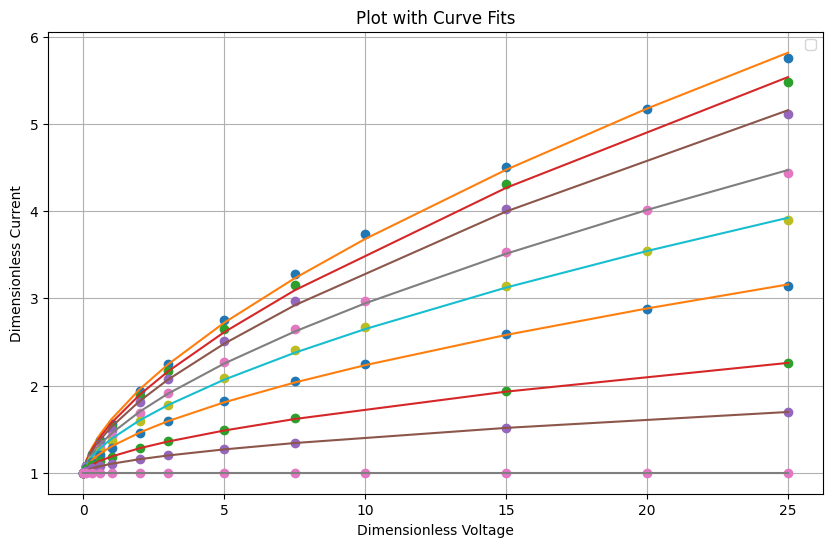

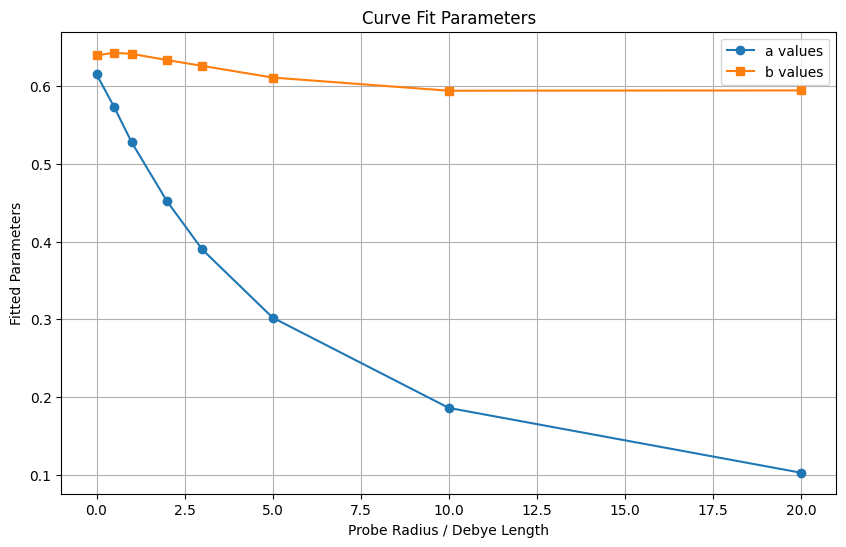

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array([0, 0.1, 0.3, 0.6, 1.0, 2.0, 3.0, 5.0, 7.5, 10.0, 15.0, 20.0, 25.0])
ratio = np.array([0, 0.5,1, 2, 3, 5, 10, 20,0])

# Table 6f
data = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1.0804, 1.076, 1.072, 1.064, 1.059, 1.051, 1.038, 1.025, 1],
    [1.2101, 1.198, 1.185, 1.163, 1.145, 1.120, 1.083, 1.050, 1],
    [1.3721, 1.351, 1.326, 1.283, 1.249, 1.200, 1.131, 1.075, 1],
    [1.5560, 1.524, 1.485, 1.418, 1.364, 1.286, 1.182, 1.104, 1],
    [ 1.9320, 1.878, 1.810, 1.689, 1.594, 1.457, 1.281, 1.155, 1],
    [2.2417, 2.170, 2.076, 1.910, 1.780, 1.595, 1.360, 1.198, 1],
    [ 2.7555, 2.652, 2.516, 2.275, 2.085, 1.820, 1.489, 1.268, 1],
    [3.2846, 3.151, 2.971, 2.652, 2.402, 2.051, 1.622, 1.341, 1],
    [ 3.7388, np.nan, np.nan, 2.975, 2.673, 2.250, np.nan, np.nan, 1],
    [4.5114, 4.308, 4.029, 3.530, 3.136, 2.588, 1.933, 1.513, 1],
    [5.1695, np.nan, np.nan, 4.008, 3.538, 2.880, np.nan, np.nan, 1],
    [5.7526, 5.485, 5.113, 4.436, 3.897, 3.142, 2.254, 1.697,1]
  ])

# Define the curve-fit function: y = a * x^b + 1
def func(x, a, b):
    return (a * x**b) + 1

# Arrays to store the fitted parameters a and b
a_vals = []
b_vals = []

# Curve fitting and plotting each column
plt.figure(figsize=(10, 6))
for col in range(data.shape[1]):
    # Filter out NaN values and corresponding x-values
    valid_indices = ~np.isnan(data[:, col])
    x_valid = x[valid_indices]
    y_valid = data[valid_indices, col]

    # Perform curve fitting
    popt, _ = curve_fit(func, x_valid, y_valid, p0=[1, 1])  # Initial guess [a, b]
    a, b = popt
    a_vals.append(a)
    b_vals.append(b)

    # Plot original data and fitted curve
    plt.plot(x_valid, y_valid, 'o')
    plt.plot(x_valid, func(x_valid, a, b))

plt.xlabel('Dimensionless Voltage')
plt.ylabel('Dimensionless Current')
plt.title('Plot with Curve Fits')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ratio[:-1], a_vals[:-1], 'o-', label='a values')
plt.plot(ratio[:-1], b_vals[:-1], 's-', label='b values')
plt.xlabel('Probe Radius / Debye Length')
plt.ylabel('Fitted Parameters')
plt.title('Curve Fit Parameters')
plt.legend()
plt.grid(True)
plt.show()

[ 0.62747449 -0.19495424  0.78122404]


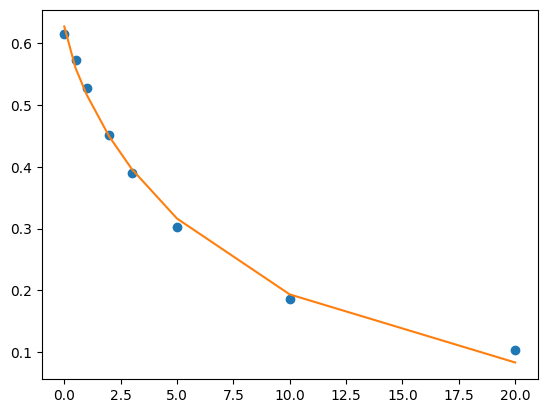

In [74]:
def func(x, a,b,c):
    return a * np.exp(b*x**c)

popt, _ = curve_fit(func, ratio[:-1], a_vals[:-1], p0=[1, 1,1])
plt.plot(ratio[:-1], a_vals[:-1], 'o')
a, b, c = popt
print(popt)
plt.plot(ratio[:-1], func(ratio[:-1], a, b, c))

1.0
1.1631300474981086
1.2129132739719242
1.245370851914305
1.2695312212375183
1.2888360786479522
1.3050111925441246
1.3190524260216643
1.3315861138174916
1.3430296315652563
1.3536727686251422
1.363722904470618
1.3733318598615571
1.3826127234303893
1.391650850543186
1.400511303864374
1.4092440317018453
1.4178875586495345
1.4264716694062876
1.4350193942540106
1.4435484997530188
1.4520726223232527
1.4606021398541613
1.4691448483663003
1.4777064917491247
1.4862911795136062
1.49490171832755
1.503539876573086
1.5122065964520222
1.5209021647169514
1.5296263505542997
1.5383785172365076
1.5471577127181866
1.5559627432513197
1.5647922332490163
1.5736446739721157
1.5825184631016076
1.5914119368581696
1.600323396012603
1.609251126878574
1.6181934181773925
1.627148574502597
1.6361149269814736
1.6450908416247978
1.654074725770025
1.663065032952894
1.6720602664848734
1.6810589819666197
1.6900597889286582
1.6990613517583422
1.7080623900454939
1.7170616784570154
1.7260580462323811
1.7350503763765857
1

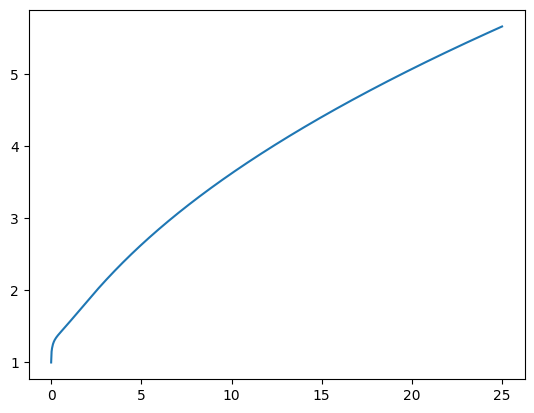

In [61]:
#for i in range(x.shape[0]):
    #print(x[i])
    #print(2 / np.sqrt(np.pi) * np.sqrt(x[i]) + special.erfcx(x[i]))
x=np.linspace(0,25,1000)
plt.plot(x,(2 / np.sqrt(np.pi)) * np.sqrt(x) + special.erfcx(x))



#Fortran II Code and Documentation

Subprograms relevant to spherical probes--UNO, DUO, TRE, SDFN, POWERS, CHASPH-are excluded.

##MAIN PROGRAM 2

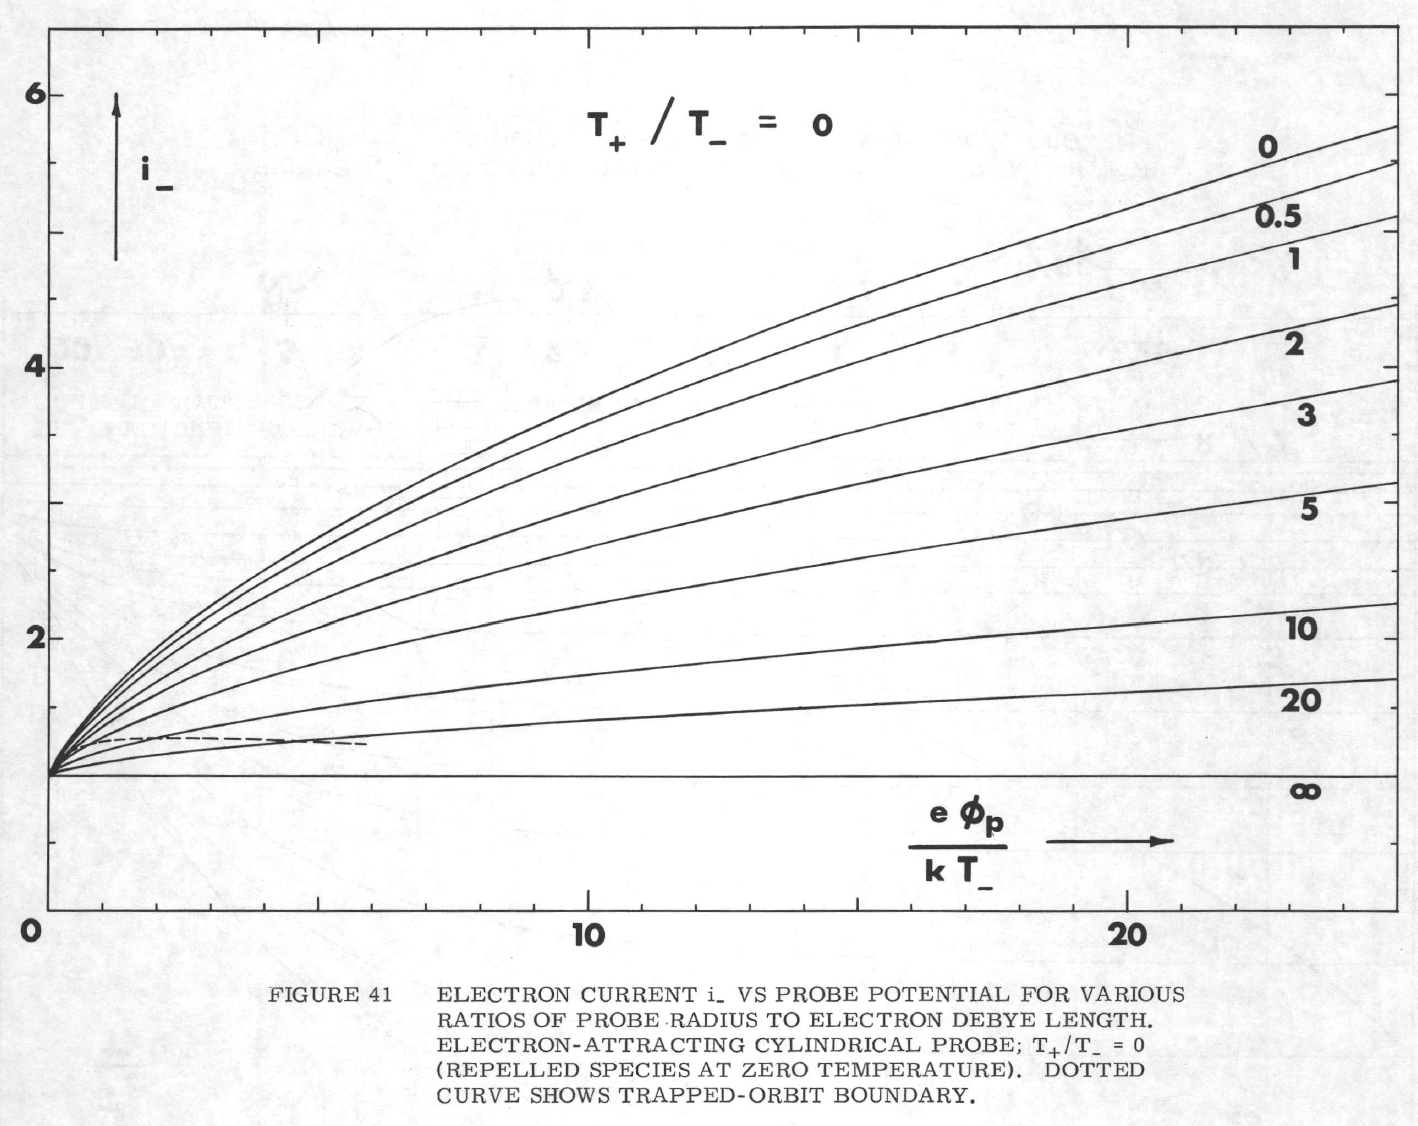

In [ ]:
C       MAIN PROGRAM 2
C       PROBE CHARACTERISTIC - REPELLED PARTICLES AT ZERO TEMPERATURE
        DIMENSION YYY(10)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

C       PTEE = NONDIMENSIONAL PROBE POTENTIAL FOR ATTRACTED PARTICLES
C       PROBYE = PROBE RADIS / DEBYE LENGTH OF ATTRACTED SPECIES
C       SHERAD = INITIAL VALUE OF SHEATH EDGE RAUIUS / PROBE RADIUS
C           IF SHERAD + VE, SHEDGE = SHERAD
C           IF SHERAD = 0, REUSE SHEDGE FROM PREVIOUS CASE
C           IF SHREAD -VE, GENERATE SHEDGE FROM CHILD-LANGMUIR RELATION
C       QT1 AND QT2 ARE COEFFICIENTS OF DEBYE TERM AND FAR FIELD TERM
C           IN MIXING FUNCTION

C       KT1 SPECIES AMOUNT OF OUTPUT FOR EACH INTERATION EXCEPT LAST
C       KT2 SPECIES AMOUNT OF OUTPUT FOR LAST ITERATIION
C       INITIA SPECIFIES WHERE INITIAL CHARGE DENSITY FUNCTION (ETA)
C           IS THAT FOR A CHILD-LANGMUIR SHEATH OR WHETHER PREVIOUS ETA
C           IS RE-USED
C           INITIA = 1 - CHILD-LANGMUIR SHEATH ASSUMED
C           INITIA = 2 - CHILD-LANGMUIR SHEATH ASSUMED TO BEGIN FIRST
C                        ITERATION. PREVIOUS ETA RE-USED WHEN SHEATH EDGE
C                        RADIUS IS RESET
C           INITIA = 3 - PREVIOUS ETA RE-USED
C       M IS NUMBER OF POINTS IN COMPUTATION NET
C       NDUB IS ITERATION AT WHICH DENSITY OF POINTS IN COMPUTATION NET
C           IS DOUBLED
C       NEND IS MAXIMUM NUMBER OF ITERATIONS
C       NPRINT - OUTPUT WILL OCCUR AT EVERY NPRINT.TH NET POINT
C       MODE SPECIFIES WHETHER COMPUTATION IS FOR SPHERICAL OR CYLINDRICAL
C           PROBE
C       MCD SPECIFIES PARTICLE DISBTRIBUTION FUNCTIONS

        KASE = 1
    3   READ INPUT TAPE 5, 4,PTEE, PROBYE,SHERAD,QT1M, QT2M
    4   FORMAT(1P3E10.3,OP2F10.7)
        READ INPUT TAPE 5,5,KT1,KT2,INITIA,M.NDUB,NEND,NPRINT,MODE,MCD
    5   FORMAT(1415)

        IF(INITIA-2)165,165,166
    166 IF(SENSE LIGHT 1)167,165
    167 IF(SENSE LIGHT 2)168,165
    168 SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 3

    165 KT1=KT1
        KT2=KT2
    222 PRINT 220,KASE
    220 FORMAT(12H0 BEGIN CASE I5)
    221 KASE = KASE_1
        IF(QTIM)321,321,320
    320 QT1=QT1M
        QT2=QT2M
    321 IF (SHERAD)400,401,402

    400 SHEDGE =1.0+1.212*(PTEE**0.75)/PROBYE
        GO TO 401

    402 SHEDGE=SHERAD
        GO TO 401

    401 GO TO (6,270),MODE
    6   WRITE OUTPUT TAPE 6,7
    7   FORMAT ( 73H1 SPHERICAL PROBE CHARACTERISTIC - REPELLED PARTICLES
    1   AT ZERO TEMPERATURE)
        GO TO 9
    270 WRITE OUTPUT TAPE 6,271
    271 FORMAT(75H1 CYLINDRICAL PROBE CHARACTERISTIC - REPELLED PARTICLES
    1   AT ZERO TEMPERATURE)
    9   WRITE OUTPUT TAPE 6,10,PTEE,PROBYE,SHEDGE,QT1,QT2
    10  FORMAT(7X4HPTEE,4X6HPROBYE,4X6HSHEDGE,7X3HQT1,7X3HQT2/
    1   1X1P3E10.3,OP2F10.7)
    81  WRITE OUTPUT TAPE 6,8,KT1,KT2,INITIA,M,NDUB,NEND,NPRINT,MODE,MCD
    8   FORMAT(47H  KT1 KT2 INITIA  M   NDUB NEND NPRINT MODE MCD /1X14I5)

        TIME = CLOCK(0.0)

    101 PI = 3.1415927
        SQTPI = 1.7724539
        VIPI = 1.0/SQTPI
        MAD = 1
        MEW = 0
        KUTY = 1
        GAMMA=PROBYE**2
        PI6=1.0
        PTEE=-ABSF(PTEE)
        PI3=PTEEKBD=1
        MZET=2
        IF(INITIA-2)15,15,112

    112 N=MP-1
        NP=MP
        FACT=GAMOLD/GAMMA*PTEE/PTOLD
        DO 90 I=1,NP
    90  ETA(I)=ETA(I)*FACT
    336 IF(N-M)17,15,19
    17  M=N2
        WRITE OUTPUT TAPE 6,22,M
    22  FORMAT(4H M=I5)
        GO TO 15
    19  L=N/M
        MP=M+1
        DO 21 I=2,MP
        J=(I-1)*L+1
    21  ETA(I)=ETA(J)
        GO TO 15

    15  SENSE LIGHT 0
        SENSE LIGHT 1
        KEND=0
        GAMOLD=GAMMA
        PTOLD=PTEE
        KSET=1

    16  FLM=M

        DELTS=1.0/FLM
        MP=M+1
        YZP=0.125

    253 DO 18 I=1,MP
        FIE=I-1
        S(I)=DELTS*FIE
        ROP(I)=SHEDGE-(SHEDGE-1.0)*(YZP*(1.0-S(I))+(1.-YZP)*(1.0-S(I))**2)
        X(I)=1.0/ROP(I)
        XSQ(I)=X(I)**2
        DXDS(I)=-XSQ(I)*(SHEDGE-1.0)*(YZP+2.0*(1.0-S(I))*(1.0-YZP))
        SCOT(I)=SQRTF(1.0-XSQ(I))
    18  COOK(I)=COOKIE()
        GO TO (20,23,20),KSET
    20  IF(2*INITIA+KSET-5)207,207,294

    207 DO 210=1,MP
        XI(I)=PTEE*((SHEDGE-1.0/X(I))/(SHEDGE-1.0))**1.3333333
    210 ETA(I)=0.5/SQRTF(1.0-2.0*XI(I))
        GO TO 294

    294 GO TO (370,370,228),KSET
    370 GO TO (26,280),MODE

C       COMPUTE POTENTIAL XI(1-MP) AND ITS GRADIENT DX1DS(1-MP) USING
C       CHARGE DENSITY ETA(1-MP)

    26  DO 33 I=1,MP
    33  Y(I)=-GAMMA*ETA(I)/(XSQ(I)**2)*DXDS(I)
        Z(I)=0.0
        KINK-1
        GO TO 34

    36  DO 38 I=1,MP
        DXIDS(I)=Z(I)*DXDS(I)
    38  Y(I)=DXIDS(I)
        Z(I)=PI3
        KINK=2
        GO TO 34

    280 DO 281 I=1,MP
    281 Y(I)=-DXDS(1)*GAMMA*ETA(I)/(X(I)*XSQ(I))
        Z(I)=0.0
        KINK=3
        GO TO 3

    282 DO 284 I=1,MP
        DXIDS(I)=Z(I)*DXDS(I)/X(I)
    284 Y(I)=DXIDS(I)
        Z(I)=PI3
        KINK=4
        GO TO 34

    34  Z(2)=Z(1)+(5.0*Y(1)+8.0*Y(2)-Y(3))*DELTS/12.0
        DO 35   I=3,M
    35  Z(I)=Z(I-1)+(13.0*(Y(I-1)+Y(I))-Y(I-2)-Y(I+1))*DELTS/24.0
        Z(MP)=Z(M)+(5.0*Y(MP)+8.0*Y(M)-Y(M-1))*DELTS/12.0
        GO TO (36,325,282,330),KINK

    325 EDGE=Z(MP)/(1.0-X(MP))
    327 DO 39 I=1,MP
        DXIDS(I)=DXIDS(I)+EDGE*DXDS(I)

    39  XI(I)=Z(I)+EDGE*(X(I)-1.0)
        GO TO (199,340,340),MCD

    330 EDGE=-Z(MP)/LOGF(X(MP))
    332 DO 285  I=1,MP
        DXIDS(I)=DXIDS(I)+EDGE*DXDS(I)/X(I)
    285 XI(I)=Z(I)+EDGE*LOGF(X(I))
        GO TO (199,340,340),MCD

C       COMPUTE NEW CHARGE DENSITY ETAPS(1-MP)

    199 CALL CHARGE
        GO TO 341

    340 CALL CHAMON
        GP TO 341

    341 IF(SENSE LIGHT 1)161,160
    161 IF(SENSE LIGHT 2)162,160
    162 SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 318

    160 KEND=KEND+1
        KT1=KT1
        GO TO (41,300,71,71),KT1

    300 MYK = 10
        LYM=1
    303 KYT=XMODF(KEND,MYK)
        IF(KYT)315,316,315
    316 KYT=1-
    315 YYY(KYT)=YPOS

    306 IF(KYT-MYK)310,307,310
    307 WRITE OUTPUT TAPE 6,302,KEND,(YYY(I),I=1,MYK)
    302 FORMAT(5H, KENDI4,3H Y=10F10.4)
    310 GO TO (41,311),LYM

    71  WRITE OUTPUT TAPE 6,45,YPOS
    45  FORMAT(3H, Y=1PE14.7)
    70  GO TO (41,41,41,42),KT1
    42  WRITE OUTPUT TAPE 6,43,(I,ROP(I),ETA(I),XI(I),ETAPS(I)),
    1   I=1,MP,NPRINT)
    43  FORMAT(2(7X1HI,3X7HR(I)/RP,11X3HETA,12X2HXI,7X7HETA NEW)/
    1   (2(4XI4,0PF10.5,1P3E14.7)))

    41  DO 40 I=1,MP
        ETANG(I)=0.0
    40  ETA(I)=(1.0-COOK(I))*ETA(I)+ETAPS(I)*COOK(I)

        PTERR=(X(MP)-XSQ(MP))*DXIDS(MP)/DXDS(MP)
        NHALT=NEND
        CALL ADJUST (NHALT,MAD,MEW,QT1,QT2,3,0.35,PTERR,PTINY)

        IF (NHALT-KEND-8)228,380,228
    380 IF(KEND-(KEND/10)*10)228,371,228
    371 ERROR=PTINY/PTEE
        IF(ABSF(ERROR)-0.0002)366,345,345

C       SHEATH EDGE POTENTIAL GRADIENT IS SMALL ENOUGH. END EXECUTION

    366 NEND=XMIN0F(KEND+8,NEND)
        WRITE OUTPUT TAPE 6,363,ERROR
        GO TO 228

C       USE CURRENT VALUE OF SHEATH EDGE POTENTIA GRADIENT TO RESET
C           SHEATH EDGE RADIUS
    345 ERDD=ERDD
        SHDD=SHDD
        ERD=ERROR
        SHD=SHEDGE
        KUTY=KUTY+1
        IF(KUTY-3)385,386,386
    386 SHEDGE=SHD-ERD*(SHD-SHDD)/(ERD-ERDD)
        IF(SHEDGE-1.0)350,350,360

    385 IF(DXIDS(MP))351,350,352

    352 DXI=-XSQ(MP)*DXIDS(MP)/DXDS(MP)
        D2XI=-ETA(MP)*GAMMA
        IF(D2XI)349,350,350

    350 WRITE OUTPUT TAPE 6,369,KUTY,ERDD,ERD,SHDD,SHD,SHEDGE
    369 FORMAT (29H TROUBLE IN SHEATH EDGE RESET 14,1P5E12.5)
        WRITE OUTPUT TAPE 6,43,(I,ROP(I),ETA(I),XI(I),ETAPS(I),I=1,MP)
        SENSE LIGHT 1
        SENSE LIGHT 2
        GO TO 318

    349 SHEDGE=SHEDGE-DXI/D2XI
        GO TO 360

    351 DO 353 L=1,M
        I=MP-L
        IF(DXIDS(I+1))354,354,350
    354 IF(DXIDS(I))353,353,355
    353 CONTINUE
        GO TO 350
    355 X(MP)=X(I)+(X(1+I)-X(I))/(-DXIDS(I+1)+DXIDS(I))*DXIDS(I)
        SHEDGE=1.0/X(MP)
        GO TO 360

    360 GO TO (361,362,362,362),KT1
    362 WRITE OUTPUT TABLE 6,363,ERROR,SHEDGE
    363 FORMAT(50H RELATIVE ERROR IN SHEATH EDGE POTENTIAL GRADIENT F11.6,
    1   24H NEW SHEATH EDGE RADIUS 1PE10.3)
    361 KSET=3
        GO TO 16

    228 IF(NEND-KEND01)46,47,46
    47  GO TO (311,312,311,311),KT1
    312 MYK=XMODF(KEND,10)
        IF(MYK)311,311,313
    313 LYM=2
        GO TO 306

    311 KT1=KT2
    46  IF(NEND-KEND)318,318,48
    48  IF(NDUB-KEND)50,51,50

    318 TOTAL=CLOCK(TIME)/100.0
        WRITE OUTPUT TAPE 6,319,TOTAL
    319 FORMAT(29H0 EXECUTION TIME IN MINUTES F7.2)
        GO TO 3

C       DOUBLE NUMBER OF POINTS IN COMPUTATION NET.

    51  IF(400-2*M)54,58,58
    58  DO 52 I=1,MP
        K=2*(MP-I)+1
        L=MP-I+1
    52  ETA(K)-ETA(L)
        M=2*M
        NPRINT=2*NPRINT
        KSET=2
        GO TO 16

    23  DO 53 I=5,MP,4
        ETA(I-3)=(3.0*ETA(I-4)+6.0*ETA(I-2)-ETA(I))/8.0
    53  ETA(I-1)=(-ETA(I-4)+6.0*ETA(I-2)+3.0*ETA(I))/8.0
    54  WRITE OUTPUT TAPE 6,57,M
    57  FORMAT(2X2HM=I8)

C       RESET SENSE LIGHTS.

    50  LITE=XMODF(KEND,4)+1
        SENSE LIGHT 0
        GO TO (61,62,63,64), LITE
    61  SENSE LIGHT 1
        GO TO (26,280),MODE
    62  SENSE LIGHT 2
        GO TO (26,280),MODE
    63  SENSE LIGHT 3
        GO TO (26,280),MODE
    64  SENSE LIGHT 4
        GO TO (26,280),MODE
        END

##ADJUST


In [ ]:
        SUBROUTINE ADJUST(NEND,MAD,MEW,QT1,QT2,KWIT, ACCY, YUSE,YINY)
C       SUBROUTINE ADJUST MONITORS CONVERGENCE OF THE CALCULATIONS AND
C           TAKES CORRECTIVE ACTION WHEN NECESSARY

C       IF KWIT=1 ADJUST TAKES NO ACTION
C       IF KWIT=2 ADJUST DAMPS ANY DIVERGENT OSCILLATIONS
C       IF KTWIT = 3 ADJUST ALSO ENDS EXECUTION WHEN ACCURACY OF RESULTS
C           IS SUFFICIENT

        DIMENSION YCHEK(10),DCHEK(10),ZCHEK(10)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

        IF(KWIT-1)228,228,21

C       IF KCHEK = 1 TO 9, STORE YCHEK(KCHEK) AND RETURN.

    21  KCHEK=XMODF(KEND,10)
        IF(KCHEK)251,250,251
    250 KCHEK=10
    251 YCHKE(KCHEK)=YUSE
    232 IF(KCHEK-8)228,121,122
    121 A8=B8
        B8=C8
        C8=YCHEK(8)
        GO TO 228
    122 IF(KCHEK-10)124,234,228
    124 A9=B9
        B9=C9
        C9=YCHEK(9)
        GO TO 228
C       IF KCHECK = 10, STORE YCHEK(10) AND LOOK FOR OSCILLATIONS IN
C       YCHEK(1-10)

    234 A10=B10
        B10=C10
        C10=YCHEK(10)
        DO 235 I=2,10
    235 DCHEK(I)=YCHEK(I)-YCHEK(I-1)
        DO 236 I=2,9
        IF (DCHEK(I))237,237,238
    237 IF(DCHEK(I+1))123,236,236
    238 IF(DCHEK(I+1))236,236,123
    236 CONTINUE
        DO 240 I=2,9
    240 ZCHEK(I)=(ABSF(DCHEK(I))+ABSF(DCHEK(I+1)))/2.0
        SMCHEK=0.0
        DO 262 I=2,8
    262 SMCHEK=SMCHEK+ZCHEK(I+1)/ZCHEK(I)
        IF(SMCHEK-6.3)123,123,242
C       OSCILLATIONS HAVE BEEN OBSERVED. DECREASE MIXING AND RETURN.

    242 MEW=0
        MAD=2
    125 QT1=QT1*0.9
        QT2=QT2*0.9
        WRITE OUTPUT TAPE 6,127,KEND,QT1,QT2
    127 FORMAT(7H0, KEND=14,27H 0.9 DECREASE IN MIX. QT1=F10.7,5H QT2=
    1   F10.7)
    128 DO 247 I=1,MP
    247 COOK(I)=COOK(I)*0.9
        228

C       OSCILLATIONS FOUNO TO BE ABSENT OR DECREASING.

    123  IF(KWIT-2)228,228,132

    132 GO TO (280,281),MZET

    280 MEW=MEW+1
        IF(MEW-2)228,134,134

    281 YMIN=YCHEK(1)
        YMAX=YCHEK(1)
        DO 282 I=1,9
        YMIN=MIN1F(YMIN,YCHEK(I+1))
    282 YMAX=MAX1F(YMIN,YCHEK(I+1))
        IF(ABSF(2.0*(YMAX-YMIN)(YMAX+YMIN))-ACCY)283,283,228
    283 YINY=(C9+C10)/2.0
        GO TO 278

C       FIND OUT IF CONVERGENCE TOWARD AN ASYMPTOTIC RESULT IS YET
C       INDICATED. IF SO, GO TO 138

    134 RIO=(B10-C10)/(A10-B10)
        IF(RIO)228,228,137
    137 IF(RIO-1.0)138,228,228

C       ESTIMATE NUMBER OF ITERATIONS REMAINING BEFORE REQUIRED ACCURACY
C       IS ATTAINED. IF THIS EXCEEDS 40, GO TO 141. OTHERWISE, GO TO 140.

    138 YINY=A10-(A10-B10)/(1.0-RIO)
        ALPH=(C10-YINY)/(A10-YINY)
        FINS=20.0*(LOGF (ACCY*YINY/(C10-YINY))/LOGF(ALPH))
        KINS=FINS
        IF(KINS-40)140,140,141

C       CONVERGENCE IS TOO SLOW. IF MIXING FUNCTION HAS NOT ALREADY BEEN
C       DECREASED BECAUSE OF OSCILLATIONS, INCREASE IT.

    141 IF(KWIT-3)228,228,28
    28  GO TO (126,228),MAD

    126 FACT=1.111
        QTY=QT2*FACT
        QT2=MIN1F(QTY,0.7)
        FACT=FACT*QT2/QTY
        QTS=QT1
        ZIT=1.0-QT2
        ZAT=QT1*FACT
        QT1=MIN1F(ZIT,ZAT)
        MEW=0
        WRITE OUTPUT TAPE 6,142,KEND,QT1,QT2,C10,YINY
    142 FORMAT(4H0KND14,13H SLO CONV QT1F10.7,4H QT2F10.7,2H YIPE10.3,
    1   5H YINY1PE10.3)
    24  DO 143 I=1,MP
    143 COOK(I)=COOKIE(I,QT1,QT2)
        GO TO 228

    C   FIND OUT IF RESULT IS SUFFICIENTLY ACCURATE. IF SO, END EXECUTION
    C   IF NOT, GO TO 145.

    140 IJJ=1
        IF(ABSF(C10-YINY)-ABSF(ACCY*YINY))144,144,275
    144 IF(ABSF(C9-YINY)-ABSF(ACCY*YINY))146,146,275

    275 IJJ-2
    146 DO 266 I=1,MP
    266 Y(I)=(2.*(ETAPS(I)-ETANG(I)-ETA(I))/(ETAPS(I)-ETANG(I)+ETA(I)))**2
        TOT=0.0
        DO 267 I=1,M
    267 TOT=TOT+(Y(I+1)+Y(I))*(ROP(I+1)-ROP(I))*0.5
        AVGE=TOT/(ROP(MP)-1.0)
        IF(AVGE-0.0100)255,255,277

    277 IJJ=2
    255 GO TO (278,145),IJJ

    278 WRITE OUTPUT TAPE 6,147,KEND,YINY
    147 FORMAT(7H0 KEND=14,36H RESULT SUFFICIENTLY ACCURATE. YINY=1PE10.3)
    26  NEND=XMIN0F(KEND+8,NEND)
        GO TO 228

    145 GO TO (228,228,151,34),KWIT

C   FIND OUT IF THERE ARE OSCILLATIONS DECREASING TOO SLOWLY TO ALLOW
C   ATTAINMENT OF REQUIRED ACCURACY WITHIN 40 ITERATIONS.
C   IF SO, GO TO 159. IF NOT, GO TO 151.

    34  IF(A8-A9)148,148,149
    148 IF(A9-A10)151,151,150
    149 IF(A9-A10)150,150,151

    150 IF(B8-B9)152,152,153
    152 IF(B9-B10)151,151,154
    153 IF(B9-B10)154,154,151

    154 IF(C8-C9)155,155,156
    155 IF(C9-C10)151,151,157
    156 IF(C9-C10)157,157,151

    157 AMA=(ABSF(A8-A9)+ABSF(A9-A10))/2.0
        AMB=(ABSF(C8-C9)+ABSF(C9-C10))/2.0
        IF(AMB*(AMB/AMA)**2-ACCY*YINY)151,151,159

    151 WRITE OUTPUT TAPE 6,170,KEND,C10,YINY,KINS,AVGE
    170 FORMAY(7H0 KEND=14,3H Y=1PE10.3,6H YINY=1PE10.3,20H ESTD. CYCYLES T
    1   O END I3.6H AVGE=0PF8.4)
    270 GO TO 228

C       DECREASE MIXING FUNCTION.

    159 QT1=QT1*0.9
        QT2=QT2*0.9
        DO 171 I=1,MP
    171 COOK(I)=COOK(I)*0.9
        WRITE OUTPUT TAPE 6,172,KEND,QT1,QT2
    172 FORMAT( 5H0KEND 14,38H OSCILLATIONS DAMPING TOO SLOWLY. QT1=F10.7,
    1   5H QT2=F10.7)
    31  MEW=0
        MAD=2
        GO TO 228

    228 RETURN
        END

##COOKIE

In [ ]:
        FUNCTION COOKIE(I,QT1,QT2)

C       FUNCTION COOKIE IS USED TO COMPUTE THE MIXING FUNCTION.
C       IT IS CALLED BY THE MAIN PROGRAM AND BY SUBROUTINE ADJUST.
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        ZAQ=SQRT(GAMMA*MIN1F(PI6,1.0))
        GO TO (100,200),MODE
    100 COOKIE=QT1*X(I)*EXPF(ZAQ*(1.0-1.0/X(I)))+QT2*XSQ(I)
        RETURN
    200 ROXI=SQRTF(X(I))
        COOKIE=QT1*ROXI*EXPF(ZAQ*(1.0-1.O/X(I)))+QT2*X(I)
        RETURN
        END

##CHARGE

In [ ]:
        SUBROUTINE CHARGE

C       SUBROUTINE CHARGE USES X1(1-MP), DXIDS(1-MP), AND ETA(1-MP) TO
C       CAUSE GENERATION OF CHARGE DENSITIES ETAPS(1-MP) AND ETANG(1-MP)
C       AND CURRENTS YPOS AND YNEG. THIS SUBROUTINE ASSUMES MAXWELLIAN
C       PARTICLES AND FINITE COLLECTED CURRENTS. IT IS CALLED BY THE MAIN
C       PROGRAM WHEN MCD=1

        DIMENSION IKRIT(3),IW(3),LOFK(3),BBETAW(3),SSW(3),MONK(3),SKRIT(3)
        DIMENSION RKRIT(3),BKRIT(3)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        KKEND = KEND
        JSIGN=1
    105 GO TO (101,102),JSIGN
    101 ZETA=GAMMA
        GO TO 103
    102 ZETA=GAMMA
    103 DO 1-6 I=1,MP
        BETAG(I)=XI(I)-DXIDS(I)*X(I)/(2.0*DXDS(I))
        OMGAG(I)=-DXIDS(I)/(2.0*X(I)*DXDS(I))
    334 Y(I)=BETAG(I)-OMGAG(I)*XSQ(MP)
        GO TO 106
    335 Y(I)=BETAG(I)
    106 CONTINUE
        GO TO (480,481),KBD
    481 GO TO (720,721),MODE
    720 BETAG(MP)=0.0
    480 Y(MP)=0.0
    721 NW=0
        NKR=0
        NOMOK=0
        IGN=1
        KLASH=1
        MAR=1
        NAQ=1
C       SEARCH INWARD FOR A POINT WHERE THE LOCUS OF EXTREMA ENTERS THE
C       FIRST QUADRANT OF THE (OMEGA,BETA) PLANE. IF ONE IS FOUND, GO TO
C       203. IF NOT, GO TO 204

        DO 107 J=2,MP
        I=MP+1-J
        IF(OMGAG(I))107,107,111
    111 IF(Y(I))107,107,112
    107 CONTINUE
        GO TO 204

    112 INIT=I
        GO TO (315,316),MODE

    315 DO 126 I=1,MP
        ALFAG(I)=(DXIDS(I)+ZETA*ETA(I)*DXDS(I)/(X(I)*XSQ(I)))/2.0

    126 EPSG(I)=ALFAG(I)*EXPF(-BETAG(I))
        GO TO 205

    316 DO 317 I=1,MP
        ALFAG(I)=DXIDS(I)+ZETA*ETA(I)*DXDS(I)/(2.0*X(I)*XSQ(I))
    317 EPSG(I)-ALFAG(I)*Z(I)
        GO TO 205

    205 DO 200 J=1,INIT
        I=INIT+1-J
        IF(OMGAG(I))200,200,201
    201 IF(Y(I))200,200,202
    202 IF(I-M)380,381,381
    380 IF(OMGAG(I+1))381,381,382
    382 IF(Y(I+1))381,381,200
    381 IF(ALFAG(I))203,460,460
    200 CONTINUE
        GO TO 204

    460 ID=I
        DO 461 J=2,ID
        I=ID+1-J
        IF(Y(I))464,465,465
    465 IF(OMGAG(I))464,463,463
    463 IF(ALFAG(I))462,461,461
    461 CONTINUE
        GO TO 462

    464 INIT=XMIN0F(I,M-1)
        GO TO 205

    462 KLASH=2
        IVAR=XMIN0F(I,M-1)
        I=ID
        GO TO 203

C       FIND THE LOCATION SSW(N) IN THE NET COORDINATE SYSTEM S,
C       CORRESPONDING TO THE NTH TIME THE LOCUS OF EXTREMA ENTERS THE
C       FIRST QUADRANT.

    203 L=I
        GO TO (206,206,440),MAR
    206 IW(MAR)=I
        INIT-I
        N=MAR
        LEAD=3
        IF(OMGAG(I+1))471,471,473
    471 LEAD=1
        IF(Y(I+1))472,472,473
    472 LEAD=2
    473 IF(I-M)117,116,116
    116 IF(ALFAG(MP))290,290,117
    290 IF(OMGAG(MP))117,313,313
    313 IF(Y(MP))117,312,312
    312 SSW(N)=S(MP)
        MONK(N)=2
        GO TO (338,340),KBD
    338 BBETAW(N)=BETAG(MP)
        GO TO 228
    117 GO TO (122,122,121),LEAD
    122 SOMA=S(I)+POLATE(DELTS,OMGAG(I),OMGAG(I+1),XSQ(I)*ALFAG(I),XSQ(I+1
    1   )*ALFAG(I+1),1,6)
        SSW(N)=SOMA
    121 GO TO (118,119,119),LEAD
    119 GO TO (342,343,KBD)
    342 Y1P=ALFAG(I)*(1.0-XSQ(MP)/XSQ(I))
        Y2P=ALFAG(I+1)*(1.0-XSQ(MP)/XSQ(I+1))
        GO TO 344
    343 Y1P=ALFAG(I)
        Y2P-ALFAG(I+1)
    344 SBET = S(I)+POLATE(DELTS,Y(I),Y(I+1),Y1P,Y2P,1,1)
        SSW(N)=SBET
    118 GO TO (474,475,474),LEAD
    475 IF(SOMA-SBET)476,477,477
    476 SSW(N)=SOMA
        LEAD=1
        GO TO 474
    477 SSW(N)=SBET
        LEAD=3
    474 MONK(N)=LEAD
        IF(LEAD+KBD-5)230,340,230
    230 BBETAW(N)=CUBIC(DELTS,BETAG(I),BETAG(I+1),ALFAG(I),ALFAG(I+1),
    1   SSW(N)-S(I),1)
        BBETAW(N)=MAX1F(0.0,BBETAW(N))
        GO TO 228
    340 BBETAW(N)=0.0
    228 GO TO (296,467),KLASH
    467 INIT=IVAR
        KLASH=1
        GO TO 296

C       SEARCH INWARD FOR A MAXIMUM IN THE LOCUS OF EXTREMA . IF ONE IS
C       FOUND, GO TO 211.

    296 DO 210 J-1,INIT
        I=INIT+1-J
        IF(ALFAG(I))210,210,390
    390 KTEST=XMIN0F(I-1,3)
        IF(KTEST)211,211,391
    391 DO 39 KV=1,KTEST
        KZ=I-KV
        IF(ALFAG(KZ))210,210,392
    392 CONTINUE
        GO TO 211
    210 CONTINUE
        BETH=BETAG(I)
        SCRIT=0.0
        SH(1)=0.0
        GO TO (223,297),NAQ

C       FOR ALL NET POINTSL SATISFYING THE APPROPRIATE CONDITIONS, FIND
C       THE POINTS SH(L) IN THE ENT COORDINATE SYSTEM S WHERE THE TANGENT
C       TO THE LOCUS OF EXTREMA AT S(L) CROSSES THE LOCUS OF EXTREMA.

    211 IKRIT(MAR)=I
        N=MAR
        CY=DELTS*ALFAG(I)/(ALFAG(I)-ALFAG(I+1))
        SKRIT(N)=S(I)+CY
        SKRIT(N)=CUBIC(DELTS,BETAG(I),BETAG(I+1),ALFAG(I),ALFAG(I+1),CY,1)
        XCRIT=X(I)+(X(I+1)-X(I))*ALFAG(I)/(ALFAG(I)-ALFAG(I+1))
    234 RKRIT(N)=1.0/XCRIT
        ICRIT=I
        I=ICRIT+1
        DO 135 K=1,ICRIT
        L=ICRIT+1-K
        JACK=1
    138 PSIG(I)=BETAG(I)-XI(L)-OMGAG(I)*XSQ(L)
        IF(PSIG(I))136,136,137
    136 I=I+1
        IF(I-IW(MAR)-1)138,138,215

    137 IF(I-ICRIT-1)330,330,139
    330 JACK=2
        GO TO 136

    139 Y1=PSIG(I-1)
        Y2=PSIG(I)
        Y1P=ALFAG(I-1)*(1.0-XSQ(L)/XSQ(I-1))
        Y2P=ALFAG(I)*(1.0-XSQ(L)/XSQ(I))
        CSI=POLATE(DELTS,Y1,Y2,Y1P,Y2P,JACK,2)
    320 SH(L)-S(I-1)+CSI
        SH(L)=MAX1F(SH(L),SKRIT(MAR))
        CSI=SH(L)-S(I-1)
        IF(SH(L)-SSW(MAR))716,215,215
    716 GO TO (325,326),MODE
    325 IF(L-1)327,326,327
    326 BETYL=CUBIC (DELTS,BETAG(I-1),BETAG(I),ALFAG(I-1),ALFAG(I),CSI,1)
        Z(L)=EXPF(-BETYL)
    327 IF(ALFAG(L))217,135,135
    217 IF(OMGAG(L)-OMGAG(L+1))135,135,402

C       SEARCH INWARDALONG THE LOCUS OF EXTREMA TO FIND OUT WHETHER IT
C       CROSSES ITSELF IN THE FIRST QUADRANT. IF SO, CALCULATE THE POINTS
C       CRISS AND CROSS IN THE NET COORDINATE SYSTEM.

    402 KLUE=0
        LASH=0
        MASH=0
        NASH=0

    401 IF(MAS+NASH-2)453,454,453
    453 IF(KLUE-6)410,410,411

    454 IVY=I-2+LASH
        BECR=BETAG(IVY)
        GO TO 455

    411 WRITE OUTPUT TAPE 6,412,KLUE,KEND
    412 FORMAT(36H TROUBLE IN SUBROUTINE CHARGE KLUE=14,11H ITERATION I5)
        BECR=(Y1+Y2)/2.0
        GO TO 455

    410 X1=OMGAG(I)
        Y1=BETAG(I)
        Y1P=XSQ(I)
        X2=OMGAG(I-1)
        Y2=BETAG(I-1)
        Y2P=XSQ(I-1)
        X3=BETAG(L+1)
        Y3=BETAG(L+1)
        Y3P=XSQ(L+1)
        X4=OMGAG(L)
        Y4=BETAG(L)
        Y4P=XSQ(L)
        DEL12=X2-X1
        DEL34=X4-X3
        DX4=X4-X1
    403 DY4=Y4-CUBIC(DEL12,Y1,Y2,Y1P,Y2P,DX4,1)
        IF(DY4)135,135,218

    218 GO TO (295,440,440),MAR
    295 IF(IGN-1)441,441,440
    441 DX1=X1-X3
        DY1=Y1-CUBIC(DEL34,Y3,Y4,Y3P,Y4P,DX1,1)
        IF(DY1)404,404,405
    404 I=I+1
        KLUE=KLUE+1
        LASH=1
        MASH=1
        GO TO 401

    405 DX2=X2-X3
        DY2=Y2-CUBIC(DEL34,Y3,Y4,Y3P,Y4P,DX2,1)
        IF(DY2)407,406,406
    406 I=I+1
        KLUE=KLUE+1
        LASH=2
        NASH=1
        GO TO 401

    407 DX3=X3-X1
        DY3-Y3-CUBIC(DEL12,Y1,Y2,Y1P,Y2P,DX3,1)
        IF(DY3)408,409,409
    409 KLUE=KLUE+8
        GO TO 401

    135 I=I-1
        BETH=BETHYL
        GO TO (224,301),NAQ

    408 DY3P=Y3P-CUBIC(DEL12,Y1,Y2,Y1P,Y2P,DX3,2)
        DY4P=Y4P-CUBIC(DEL12,Y1,Y2,Y1P,Y2P,DX4,2)
        XCR=POLATE(DEL34,DY3,DY4,DY3P,DY4P,1,3)
        BECR=CUBIC(DEL34,Y3,Y4,Y3P,Y4P,XCR,1)
    455 Y1=BETAG(L)-BECR
        Y2=BETAG(I)-BECR
        CRISS=S(L)+POLATE(DELTS,Y1,Y2,ALFAG(L),ALFAG(L+1),1,4)
        Y1=BETAG(I-1)-BECR
        Y2=BETAG(I)-BECR
        CROSS=S(I-1)+POLATE(DELTS,Y1,Y2,ALFAG(I-1),ALFAG(I),1,5)
    395 IF(CROSS-SSW(MAR))715,215,215
    715 MAR=2
        NAQ=2
        IW(2)=L
        INIT=L
        SSW(2)=CRISS
        GO TO 296

    440 IGN=IGN+1
        IG(IGN-8)457,400,400
    457 MAR=1
        NAQ=1
        INIT=L
        DO 450 I=1,MP
    450 Z(I)=EXPF(-BETAG(I))
        GO TO 296

    215 GO TO (300,440),NAQ
    300 LOFK(MAR)=L
        NOMOK=MAR
        INIT=L
        MAR=MAR+1
        GO TO 205

    204 NW=MAR-1
        NKR=MAR-1
        IF(XI(I))220,221,221

    220 LINK=5
        GO TO (336,337),KBD
    336 BETH=-XI(I)/(1.0/XSQ(MP)-1.0)
        GO TO 225
    337 BETH=0.0
        GO TO 225

    221 LINK=6
        BETH=XI(I)
        GO TO 225

    223 LINK=1
        NW=MAR
        NKR-MAR
        GO TO 225
    224 LINK=2
        NW=MAR
        NKR=MAR
        GO TO 225

    207 LINK=7
        NW=1
        NKR=2
        GO TO 225

    301 LINK=8
        NW=1
        NKR=2
        GO TO 225

    225 IF(NW)226,226,470
    470 MACK=MONK(NW)
        MIKE=MONK(1)
        N2=(MACK-4)*MACK+5
        N22=(MIKE-4)*MIKE+5
        IF(MACK-1)245,246,245
    246 GO TO (247,247,400,400,400,245,247,247,400,400),LINK
    247 LINK=LINK+2
    245 IF(NW-1)226,226,251
    251 IF(MIKE-1)226,310,226
    310 IF(LINK-3)400,226,311
    311 IF(LINK-4)400,226,400

    400 GO TO 282

    226 EXY=EXPF(-BETH)
        EDY=EXY/SQTPI
        IF(NW-1)265,261,262
    261 SW=SSW(1)
        SWA=S(MP)+1.0
        BETAW=BBETAW(1)
        GO TO 265
    262 SW=SSW(2)
        SWA=SSW(1)
        BETAW=BBETAW(2)
        BETAWA=BBETAW(1)
        GO TO (374,282,372),MACK

    374 GO TO (375,265,265),MIKE
    375 IF(BETAWA-BETAW)265,265,376
    376 BETAW=BETAWA
        GO TO 265

    372 GO TO (282,373,373),MIKE
    373 IF(BETAW-BETAWA)265,265,371
    371 BETAW=BETAWA
        GO TO 265

    265 GO TO (266,267,266,267,267,267,303,304,303,304),LINK

    266 SCRIT=0.0
        IF(NKR-1)270,281,282
    281 SCRITA=SKRIT(1)
        GO TO 270
    267 IF(NKR-1)285,286,287
    285 IF(LINK-5)282,270,270
    286 SCRIT=SKRIT(1)
        GO TO 270
    287 SCRIT=SKRIT(2)
        SCRITA=SKRIT(1)
        GO TO 270

    303 IF(NKR-1)282,305,282
    305 SCRIT=0.0
        SCRITA=SKRIT(1)
        GO TO 275
    304 IF(NKR-2)282,306,282
    306 SCRIT=SKRIT(2)
        SCRITA=SKRIT(1)
        GO TO 275

    282 WRITE OUTPUT TAPE 6,283,KEND,JSIGN,LINK,NW,NKR,MACK,MIKE,IGN,
    1   SCRIT, SCRITA
    283 FORMAT(52H TROUBLE IN SUBROUTINE CHARGE.EXECUTION TERMINATED
    1   16,714,1P2E12.5)
        SENSE LIGHT 1
        SENSE LIGHT 2
        RETURN

    270 IF(NOMOK-1)271,272,273
    271 LK=MP+1
        GO TO 275
    272 LK=LOFK(2)
        LKA=LOFK(1)
        GO TO 275
    273 LK=LOFK(2)
        LKA=LOFK(1)
        GO TO 275

    275 KT1=KT1
        IF(IGN-1)446,446,447
    447 WRITE OUTPUT TAPE 6,448,IGN,JSIGN,KEND
    448 FORMAT(33H LOCUS OF EXTREMA CROSSES ITSELF 13,19H TIMES DURING PAR
    1   T 12,14H OF ITERATION I5)
    446 GO TO (160,160,156,156),KT1
    156 IF(NKR)236,236,237
    236 WRITE OUTPUT TAPE 6,240,LINK,BETAG(I)
    240 FORMAT(6H LINK=I2,12H   BETAG(1=1PE12.5))
        GO TO 160
    237 WRITE OUTPUT TAPE 6,241,LINK   ,  BETH  , (RKRIT(I),KBRIT(I),I=1,NKR)
    241 FORMAT(6H LINK=I2,6H BETH=1PE12.5,(7H RTRAP=1PE12.5,7H BTRAP=
    1   1PE12.5))

    160 GO TO (171,171,173,173,175,175,308,308,308,308),LINK

    171 CALL FIRST
        GO TO 700
    173 CALL SECOND
        GO TO 700
    175 CALL THIRD
        GO TO 700
    308 CALL FOURTH

    700 GO TO (701,702),JSIGN

    701 DO 705 I=1,MP
    705 ETAPS(I)=RHO(I)
        YPOS=YST
        IF(MZET-1)713,713,714
    713 JSIGN=2
        SHIFT=-P16
        DO 706 I=1,MP
        XI(I)=XI(I)*SHIFT
    706 ETA(I)=-ETA(I)
        GO TO 105

    702 DO 710 I=1,MP
    710 ETANG(I)=RHO(I)
        YNEG=YST
        DO 712 I=1,MP
        XI(I)=XI(I)/SHIFT
        DXIDS(I)=DXIDS(I)/SHIFT
    712 ETA(I)=-ETA(I)
    714 RETURN
        END


SyntaxError: invalid decimal literal (<ipython-input-1-f59fdb2bc309>, line 231)

##CUBIC

In [ ]:
        FUNCTION CUBIC(DELTS,Y1,Y2,Y1P,Y2P,CSI,N)

C       IF N=1, THIS SUBPROGRAM FINDS Y FOR X = CSI, ASSUMING THAT Y IS A
C       CUBIC WITH Y = Y1 AND SLOPE = Y1P AT X = 0, AND Y = Y2 AND SLOPE =
C       Y2P AT X = DELTS. IF N=2, THE DERIVATIVE OF Y AT X = CSI IS
C       CALCUALTED

        A=(3.0*(Y2-Y1)-DELTS*(2.O*Y1P+Y2P))/DELTS**2
        B=(DELTS*(Y1P+Y2P)-2.0*(Y2-Y1))/DELTS**3
        GO TO (10,11),N
    10  CUBIC=Y1+CSI*(Y1P+CSI*(A+CSI*B))
        RETURN
    11  CUBIC=Y1P+CSI*(2.0*A*CSI*3.0*B)
        RETURN
        END

##POLATE

In [ ]:
        FUNCTION POLATE(DELTS,Y1,Y2,Y1P,Y2P,JACK,JOE)

C       POLATE GENERATES A CUBIC WITH Y=Y1 AND SLOPE=Y1P AT XS=0 AND Y=Y2
C       AND SLOPE=Y2P AT XS=DELTS. IT THEN USES NEWTONS METHOD TO FIND A
C       ROOT IN THE INTERVAL (0,DELTS) IF JACK =1, IN THE INTERVAL
C       (-DELTS,0) IF JACK=2.

        DIMENSION Q(2)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        K=1
        DUMP1=X(K)
        DUMP2=OMGAG(K)
        DUMP3=SETAG(K)
        DUMP4=ALFAG(K)
        DUMP5=PSIG(K)
        DUMP6=Y(K)
        DDELTS=DELTS
        DY1=Y1
        DY2=Y2
        DY1P=Y1P
        DY2P=Y2P
        JJACK=JACK
        JJOE=JOE

        CTEST=DELTS*FLOATF(JACK-1)
        GO TO (35,36),JACK
    35  IF(Y1/Y1P)37,36,38
    37  IF(Y2/Y2P)39,36,36
    38  IF(Y2/Y2P)36,36,40
    39  XN=-Y1/Y1P
        GO TO 41
    40  XN=DELTS-Y2/Y2P
    41  IF(XN)36,36,42
    42  IF(DELTS-XN)36,36,27
    36  XN=DELTS*Y1/(Y1-Y2)
        IF(Y1*Y2)51,17,51
    51  IF(XN+CTEST)25,25,26
    25  GOTO (20,27),JACK
    26  IF(XN+CTEST-DELTS)27,20,20

    20  WRITE OUTPUT TAPE 6,14,DELTS,Y1,Y2,Y1P,Y2P,XN,JACK,JOE
    14  FORMAT(16H POLATE TROUBLE,1P6E12.5,213)
        POLATE=MAX1F(-0.5*DELTS,MIN1F(XN,(1.5-2.0*FLOATF(JACK01))*DELTS))
        RETURN

    27  XS=XN
        DO 10 I=1,10
        DO 50 J=1,2
    50  Q(J)=CUBIC(DELTS,Y1,Y2,Y1P,Y2P,XS,J)
        XT=XS-Q(I)/Q(2)
    13  IF(ABSF(XS-XT)/DELTS-1.0E-05)15,15,10
    10  XS=XT
    15  IF(XT+CTEST)31,31,32
    31  GO TO (17,21),JACK
    32  IF(XT+CTEST-DELTS)34,17,17

    21  POLATE=-0.999*DELTS
        RETURN

    17  POLATE=XN
        RETURN

    34  POLATE = XT
        RETURN
        END

##CHAMON (may not be needed)

In [ ]:
        SUBROUTINE CHAMON

C       SUBROUTINE CHAMON CARRIES OUT A COMPUTATION ANALOGOUS TO THAT OF
C       SUBROUTINE CHARGE IN THE CASE OF SIMPLIFIED PARTICLE DISTRIBUTIONS,
C       AS FOLLOWS.

C       MCD=2 - ATTRACTED PARTICLES MONO-ENERGETIC.
C       MCD=3 - SAME AS MCD=2 FOR ATTRACTED SPECIES. REPELLED PARTICLE
C               DENSITY DESCRIBED BY BOLTZMANN FACTOR.
C       MCD=4 - ATTRACTED PARTICLES AT ZERO ENERGY. CYLINDRICAL PROBE ONLY
C       MCD=5 - SAME AS MCD=4 FOR ATTRACTED SPECIES. SAME AS MCD=3 FOR
C               REPELLED SPECIES.

C       IF MCD = 4 OR 5, THIS SUBROUTINE MUST BE RUN WITH KBD=2 AND MODE=2

        DIMENSION IKRIT(3),IW(3),LOFK(3),BBETAW(3),SSW(3),MONK(3),SKRIT(3)
        DIMENSION RKRIT(3),BKRIT(3)
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

    401 GO TO (330,404,405,521,522),MCD
    404 WRITE OUTPUT TAPE 6,406
    406 FORMAT (86X34HATTRACTED PARTICLES MONO-ENERGETIC)
        GO TO (535,536),MODE

    405 WRITE OUTPUT TAPE 6,407
    407 FORMAT(44X76HATTRACTED PARTICLES MONO-ENERGETIC, PROBE DOES NOT AB
      1 SORB REPELLED PARTICLES)
        GO TO (535,536),MODE

    535 ENG=4.0/PI
        SQNG=SQRTF(ENG)
        GO TO 330
    536 ENG=PI/4.0
        GO TO 330

    521 WRTE OUTPUT TAPE 6,523
    523 FORMAT(86X34HATTRACTED PARTICLES AT ZERO ENERGY)
        ENG=0.0
        GO TO 330

    522 WRITE OUTPUT TAPE 6,524
    524 FORMAT(44X76HATTRACTED PARTICLES AT ZERO ENERGY. PROBE DOES NOT AB
      1 SORB REPELLED PARTICLES)
        ENG=0.0
        GO TO 330

    330 IF(PI3)402,320,320

    320 BETH=XI(1)
        EXY=EXPF(-BETH)
        EDY=EXY/SQTPI
        CALL THIRD
        GO TO 458

    402 DO 106 I=1,MP
        BETAG(I)=XI(I)-DXIDS*X(I)/(2.0*DXDS(I))
        OMGAG(I)=-DXIDS(I)/(2.0*X(I)*DXDS(I))
        GO TO (505,506),KBD
    505 Y(I)=BETAG(I)-OMGAG(I)*XSQ(MP)
        GO TO 106
    506 Y(I)=BETAG(I)
    106 CONTINUE
        GO TO (315,316),MODE

    315 DO 126 I=1,MP
    126 ALFAG(I)=(DXIDS(I)+GAMMA*ETA(I)*DXDS(I)/(X(I)*XSQ(I)))/2.0
        GO TO 101

    316 DO 317 I=1,MP
    317 ALFAG(I)=DXIDS(I)+GAMMA*ETA(I)*DXDS(I)/(2.0*X(I)*XSQ(I))
        GO TO 101

    101 NKR=0
        INIT=M
    205 IF(INIT)204,204,206

    206 DO 600 J=1,INIT
        I=INIT+1-J

        IF(OMGAG(I))200,200,207
    207 IF(Y(I))200,202
    202 IF(BETAG(I)-ENG)200,200,413
    413 IF(BETAG(I+1)-ENG)201,201,200

    200 IF(OMGAG(I))600,600,601
    601 IF(OMGAG(I+1))602,602,600
    602 IF(BETAG(I)-ENG)600,600,603

    600 CONTINUE
        GO TO 204

    201 NKR=NKR+1
        INIT=I-2
        GO TO(415,415,416),NKR
    415 FRA=(ENG-BETAG(I+1))/(BETAG(I)-BETAG(I+1))
        OMEGA(NKR)=OMGAG(I+1)+(OMGAG(I)-OMGAG(I+1))*FRA
        GO TO 605

    603 NKR=NKR+1
        INIT=I-2
        GO TO (604,604,416),NKR
    604 FRA=-OMGAG(I+1)/(OMGAG(I)-OMGAG(I+1))
        OMEGA(NKR)=0.0
        GO TO 605

    605 SSW(NKR)=S(I+1)+(S(I)-S(I+1))*FRA
        XW(NKR)=X(I+1)-(X(I)-X(I+1))*FRA
        RW(NKR)=1.0/XW(NKR)
        GO TO (520,500),KBD
    520 SL=ENG/XSQ(MP)
        IF(OMEGA(NKR)-SL)500,500,501

    500 GO TO (205,417),NKR
    417 IF(OMEGA(1)-OMEGA(2))419,419,205
    419 NKR=1
        GO TO 205

    501 NKR=NKR-1
        GO TO 205

    416 WRITE OUTPUT TAPE 6,208
    208 FORMAT(86H LOCUS OF EXTREMA AFFECTS COMPUTATION AT THREE ORE MORE L
      1 OCATIONS. EXECUTION TERMINATED)
        SENSE LIGHT 1
        SENSE LIGHT 2
        RETURN

    204 NTRAP=1
    482 INDY=INIT+1
        DO 483 J=1,INDY
        I=INDY+1-J
        IF(ALFAG(I))483,483,484
    484 IF(ALFAG(I+1))485,485,483
    485 IF(BETAG(I))541,541,540
    541 IF(BETAG(I+1))483,483,530
    483 CONTINUE
        GO TO 481

    540 NTRAP=2
        CY=DELTS*ALFAG(I)/(ALFAG(I)-ALFAG(I+1))
        BTRAP =  CUBIC(DELTS,BETAG(I),BETAG(I+1),ALFAG(I),ALFAG(I+1),CY,1)
        XTRAP=X(I)+(X(I+1)-X(I))*ALFAG(I)/(ALFAG(I)-ALFAG(I+1))
        RTRAP=1.0/XTRAP
        GO TO 481

    481 PL=ENG-XI(I)
        IF(NKR)489,489,490
    489 OMA=PL
        GO TO 491
    490 OMA=MIN1F(OMEGA(NKR),PL)
    491 OMA=MAX1F(OMA,0.0)
        GO TO (507,508),KBD
    507 SL=ENG/XSQ(MP)
        OMA=MIN1F(OMA,SL)

    508 KT1=KT1
        GO TO (160,160,156,156),KT1
    156 IF(NKR)236,236,237
    236 WRITE OUTPUT TAPE 6,241,PL,SL,BETAG(1)
    241 FORMAT(4H PL=1PE11.4,4H SL=1PE11.4,9H BETAG(1)  1PE11.4,
      1 (3H RW    1PE11.4,6H OMEGA 1PE11.4  ))
        GO TO (160,487),NTRAP
    237 WRITE OUTPUT TAPE 6,241,PL,SL,BETAG(1),(RW(I),OMEGA(I),I=1,NKR)
        GO TO (160,487),NTRAP

    487 WRITE OUTPUT TAPE 6,488,RTRAP,BTRAP
    488 FORMAT(76X8H  RTRAP=1PE14.7,8H  BTRAP=1PE14.7)
        GO TO 160

    160 DO 420 L=1,MP
        LL=L
        RL=(ENG-XI(L))/XSQ(L)
        IF(NKR-1)421,422,423
    421 OMB=RL
        GO TO 430

    422 IF(S(L)-SSW(1))424,421,421
    424 OMB=MIN1F(RL,OMEGA(1))
        GO TO 430

    423 IF(S(L)-SSW(2))425,422,422
    425 OMB=MIN1F(RL,OMEGA(2))
        GO TO 430

    430 OMB=MAX1F(OMB,0.0)
        GO TO (510,511),KBD
    510 OMB=MIN1F(OMB,SL)
    511 IF(OMA-OMB)431,432,433

    433 WRITE OUTPUT TAPE 6,480,OMA,OMB,LL,RL,NKR,KEND
    480 FORMAT(27H OMA GREATER THAN OMB. OMA=1PE14.7.7,5H, OMB=1PE14.7,4H LL=
      1  I4,4H RL=1PE14.7,5H NKR=12,6H KEND=I4)
        OMA=OMB
        GO TO 432

    431 IF(OMA)434,434,435

    434 IF(OMB-RL)436,437,437
    436 GO TO (438,439),MODE

    438 RHO(L) =(SQRTF(ENG-XI(L))-SQRTF(XSQ(L)*(RL-OMB)))/SQNG
        GO TO 420
    439 RHO(L) = 2.0*VIPI*ATANF(SQRTF(OMB/(RL-OMB)))
        GO TO 420

    437 GO TO (440,441),MODE

    440 RHO(L) = SQRTF(ENG-XI(L))/SQNG
        GO TO 420
    441 RHO(L) = 1.0
        GO TO 420

    435 IF(OMB-RL)442,443,443

    442 GO TO (444,445),MODE
    444 RHO(L) =(0.5*(SQRTF(ENG-XI(L))+SQRTF(XSQ(L)*(RL-OMA)))
      1 -SQRTF(XSQ(L)*(RL-OMB))  )/SQNG
        GO TO 420
    445 RHO(L) = VIPI*(2.0*ATANF*(SQRTF(OMB/(RL-OMB)))ATANF(SQRTF(OMA/(RL-
      1 OMA))))
        GO TO 420

    443 GO TO (446,447),MODE

    446 RHO(L) =(0.5*(SQRTF(ENG-XI(L))+SQRTF(XSQ(L)*(RL-OMA))))/SQNG
        GO TO 420
    447 RHO(L) = 1.0-VIPI*ATANF(SQRTF(OMA/(RL-OMA)))
        GO TO 420

    432 IF(OMA)448,449,449

    448 RHO(L) = 0.0
        GO TO 420

    449 IF(OMB-RL)450,451,451

    430 GO TO (452,453),MODE

    452 RHO(L) =(0.5*(SQRTF(ENG-XI(L))-SQRTF(XSQ(L)*(RL-OMA))))/SQNG
        GO TO 420
    453 RHO(L) = VIPI*ATANF(SQRTF(OMA/(RL-OMA)))
        GO TO 420

    451 GO TO (454,455),MODE

    454 RHO(L) = 0.5*SQRTF(ENG-XI(L))/SQNG
        GO TO 420
    455 RHO(L) = 0.5
        GO TO 420

    420 CONTINUE
        GO TO (456,457),MODE

    456 YST=0.5*SQTPI*OMA/SQNG
        GO TO 321
    457 IF(MCD-3)530,530,531
    530 YST =2.0*SAY*SQRTF(OMA)
        GO TO 321
    531 YST=2.0*SAY*SQRTF(OMA*PI6)
        GO TO 321

    321 IF(PI3)458,322,322

    458 DO 325 I=1,MP
    325 ETAPS(I)=RHO(I)
        YPOS=YST
        IF(MZET-1)331,331,332
    331 DO 326 I=1,MP
        XI(I)=-XI(I)*PI6
        DXIDS(I)=-DXIDS(I)*PI6
    326 ETA(I)=-ETA(I)
        IF(PI3)323,402,402

    323 BETH=XI(1)
        EXY=EXPF(-BETH)
        EDY=EXY/SQTPI
        CALL THIRD
        GO TO 322

    322 DO 327 I=1,MP
    327 ETANG(I)=RHO(I)
        YNEG=YST
        DO 328 I=1,MP
        XI(I)=-XI(I)/PI6
        DXIDS(I)=-DXIDS(I)/PI6
    328 ETA(I)=-ETA(I)
    332 RETURN
        END

##CAL

In [ ]:
        FUNCTION CAL(JACK,SA,SN,N1,N2)

C       IF N1=1, INTEGRATION STARTS ON A NET POINT
C       IF N1=2, INTEGRATION MAY START OFF A NET POINT
C       IF N1=3, INTEGRATION MAY START OFF A NET POINT AND INTEGRAND
C           BECOMES IMAGINARY OUTSIDE LIMIT OF INTEGRATION.
C       SIMILARLY FOR N2.
C       IF JACK=1 THEN CONTRIBUTION IS TO CHARGE DENSITY
C       IF JACK=2 THEN CONTRIBUTION IS TO COLLECTED CURRENT
C       SA AND SB ARE LIMITS OF INTEGRATION

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

        SUM=0.0
        JJACK=JACK
        DSA=SA
        DSB=SB
        NN1=N1
    384 NN2=N2
        GO TO (385,386),MODE
    386 NN1=XMIN0F(NN1,2)
        NN2=XMIN0F(NN2,2)

    385 GO TO (201,202,203)NN1
    201 IA=SA/DELTS+1.1
        IAX=IA
        GO TO 205
    202 IA=SA/DELTS+1.0
        IAX=XMAX0F(IA-1,1)
        GO TO 205
    203 IA=SA/DELTS+2.0
        IAX=IA
        GO TO 205

    205 GO TO (206,207,208),NN2
    206 IB=SB/DELTS+1.1
        IBX=IB
        GO TO 210
    207 IB=SB/DELTS+2.0
        IBX=XMIN0F(IB+1,MP)
        GO TO 210
    208 IB=SB/DELTS+1.0
        IBX=IB
        GO TO 210
    210 GO TO (211,225),JACK

    211 DO 212 I=IAX,IBX
        IF(I-LL)221,222,221
    221 PSIG(I)=BETAG(I)-XI(LL)-OMGAG(I)*XSQ(LL)
        IF(PSIG(I))213,214,214
    213 IF(S(I)-SA)215,216,216
    216 IF(SB-S(I))215,217,217

    217 IF(MXXX-KEND-1)320,321,320

    320 IF(XABSF(I-LL)-4)321,321,353
    321 KCAJ=KCAJ+1
        GO TO 222
    353 WRITE OUTPUT TAPE 6,218,I,LL,PSIG(I),KCAJ,KEND
    218 FORMAT(39H BETAG VS OMGAG CROSS ITS TANGENT     I=  13,4H LL=13,
      1  9H PSIG(I= 1PE14.7,6H KCAJ=14.6H KEND=I4))
        MXXX=KEND+1
        KCAJ=0
        GO TO 222

    215 GO TO (290,293),MODE
    290 Y(I)=-EPSG(I)*SQRTF(-PSIG(I))
        GO TO 212

    222 PSIG(I)=0.0
        GO TO (315,293),MODE
    315 Y(I)=0.0
        GO TO 212

    214 GO TO (292,293),MODE
    292 Y(I)=EPSG(I)*SQRTF(PSIG(I))
        GO TO 212
    293 IF(OMGAG(I))294,315,294
    294 QTPI=ATANF(SQRTF(ABSF(PSIG(I)/(XSQ(LL)*OMGAG(I)))))
        Y(I)=SIGNF(1.0,OMGAG(I))*EPSG(I)*(1.5707963-SIGNF(QTPI,PSIG(I)))
        GO TO 212
    212 CONTINUE
        GO TO 230

    225 GO TO (296,297),MODE

    296 DO 226 I=IAX,IBX
    226 Y(I)=EPSG(I)*OMGAG(I)
        GO TO 230

    297 DO 310 I=IAX,IBX
    310 Y(I)=SIGNF(1.0,OMGAG(I))*EPSG(I)*SQRTF(ABSF(OMGAG(I)))
        GO TO 230

    230 MIKY=1
        ARINA=0.0
        ARINB=0.0
        GO TO (231,232,233),NN1
    231 YA=Y(IA)
        AREAA=0.0
        GO TO 234
    232 IF(IBX-IA-1)360,360,326
    360 IF(IBX-IA)325,325,362
    362 IF(IA-IAX)325,325,363
    325 YA=Y(IA)+(Y(IA+1)-Y(IA))*(SA-S(IA))/DELTS
        AREAA=(S(IA+1)-SA)*(YA+Y(IA+1))*0.5
        GO TO 327
    363 CSI=(SA-S(IA))/DELTS
        CTA=0.5*(Y(IA+1)-Y(IA-1))
        CTB=0.5*(Y(IA+1)_Y(IA-1))-Y(IA)
        YA=Y(IA)+CSI*(CTA+CSI*CTB)
        AREAA=DELTS*Y((IA)*(1.0-CSI)+CTA/2.0*(1.0-CSI**2)+CTB/3.0*(1.0-CSI
      1 **3))
    326 CSI=(SA-S(IA+1))/DELTS
        CTA=0.5*Y(IA+2)-Y(IA)
        CTB=0.5*(Y(IA+2)+Y(IA))-Y(IA+1)
        YA=Y(IA+1)+CSI*(CTA+CSI*CTB)
        AREAA=-CSI*(Y(IA+1)+CSI*(CTA/2.0+CSI*CTB/3.0))*DELTS
        ARINA=(Y(IA+1)+CTA/2.0+CTB/3.0)*DELTS
        MIKY=MIKY+1
    327 IA=IA+1
        GO TO 234
    233 YA=0.0
        AREAA=(S(IA)-SA)*Y(IA)*0.5
        GO TO 234

    234 GO TO (236,237,238),NN2
    236 YB=Y(IB)
        AREAB=0.0
        GO TO 239
    237 IF(IB-IAX-1)369,369,342
    369 IF(IBX-IB)341,341,365
    365 IF(IB-IAX)341,341,366
    341 YB=Y(IB-1)+(Y(IB)-Y(IB-1))*(SB-S(IB-1))/DELTS
        AREAB=(SB-S(IB-1))*(Y(IB-1)+YB)*0.5
        GO TO 343
    366 CSI=(SB-S(IB))/DELTS
        CTA=0.5*(Y(IB+1)-Y(IB-1))
        CTB=0.5*(Y(IB+1)+Y(IB-1))-Y(IB)
        YB=Y(IB)+CSI*(CTA+CSI*CTB)
        AREAB=DELTS*(Y(IB)*(CSI+1.0)+CTA/2.0*(CSI**2-1.0)+CTB/3.0*(CSI**3
      1  +1.0))
        GO TO 343
    342 CSI=(SB-S(IB-1))/DELTS
        CTA=0.5*(Y(IB)-Y(IB-2))
        CTB=0.5*(Y(IB)+Y(IB-2))-Y(IB-1)
        YB=Y(IB-1)+CSI*(CTA+CSI*CTB)
        AREAB=CSI*(Y(IB-1)+CSI*(CTA/2.0+CSI*CTB/3.0))*DELTS
        ARINB=(Y(IB-1)-CTA/2.0+CTB/3.0)*DELTS
        MIKY=MIKY+1
    343 IB=IB-1
        GO TO 239
    238 YB=0.0
        AREAB=(SB-S(IB))*Y(IB)*0.5
        GO TO 239

    239 IF(IB-IA)241,242,243
    241 IF(SB-SA)246,247,248
    246 ISA=SA/DELTS
        ISB=SB/DELTS
        IF(ISB-ISA)282,286,282

    286 IF(NXXX-KEND-1)355,356,355
    356 NNN=NNN+1
        GO TO 247
    355 WRITE OUTPUT TAPE 6,249,SA,SB,LL,KEND,NNN
    249 FORMAT(33H SB A LITTLE SMALL THAN SA. SA= 1PE14.7,4H SB=1PE14.7,
      1  4H LL=I3.6H KEND=I4,5H NNN=I4)
        NXXX=KEND+1
        NNN=0
        GO TO 247

    282 IF(LXX-KEND-1)351,350,351
    350 KKK=KKK+1
        GO TO 247
    351 WRITE OUTPUT TAPE 6,284,SA,SB,LL,KEND,KKK
    284 FORMAT(32H SB IS MUCHSMALLER THAN SA. SA=1PE14.7,4H SB=1PE14.7,
      1  4H LL=I3,6H KEND=I4,5H KKK=I4)
        LXXX=KEND+1
        KKK=0
        GO TO 247

    247 SUM=0.0
        GO TO 275

    248 IF(IAX-IB)370,371,371
    370 IV=IB
        GO TO 375
    371 IF(IBX-IA)372,372,373
    373 IV=IA
    375 CTA=0.5*(Y(IV+1)-Y(IV-1))
        CTB=0.5*(Y(IV+1)+Y(IV-1))-Y(IV)
        CSI1=(SA-S(IV))/DELTS
        CSI2=(SB-S(IV))/DELTS
        SUM=DELTS*(Y(IV)*(CSI2-CSI1)+CTA/2.0*(CSI2**2-CSI1**2)+CTB/3.0*(
      1  CSI2**3-CSI1**3))
        GO TO 275
    372 SUM=(YA+YB)*(SB-SA)/2.0
        GO TO 275

    242 SUM=AREAA+AREAB
        GO TO 275

    243 SUM=AREAA+AREAB
        IF(IB-IA-2)251,261,261
    251 GO TO (345,346,347),MIKY
    345 SUM=SUM+0.5*(Y(IA)+Y(IB))*DELTS
        GO TO 275
    346 SUM=SUM+ARINA+ARINB
        GO TO 275
    347 SUM=SUM+0.5*(ARINA+ARINB)
        GO TO 275

    261 NUM=IB-IA
        IF(NUM-3)332,333,340
    340 IF(NUM-5)334,335,335

    332 SUM=SUM+(Y(IA)+4.0*Y(IB-1)+Y(IB))*DELTS/3.0
        GO TO 275

    333 SUM=SUM+(Y(IA)+Y(IB)+3.0*(Y(IA+1)+Y(IB-1)))*DELTS*0.375
        GO TO 275

    334 SUM=SUM+(9.0*(Y(IA)+Y(IB))+28.0*(Y(IA+1)+Y(IB-1))+22.0*Y(IB-2))*
      1  DELTS/24.0
        GO TO 275

    335 SUM=SUM+(9.0*(Y(IA)+Y(IB))+28.0*(Y(IA+1)+Y(IB-1))+23.0*(Y(IA+2)+Y(
      1  IB-2)))*DELTS/24.0
        IF(NUM-5)275,275,336

    336 IAP=IA+3
        IBP=IB-3
        STA=0.0
        DO 337 I=IAP,IBP
    337 STA=STA+Y(I)
        SUM=SUM+STA*DELTS

    275 GO TO (271,272),JACK
    271 GO TO (300,301),MODE
    300 CAL=-SUM/SQTPI
        RETURN
    301 CAL=-SUM/PI
        RETURN
    327 GO TO (302,303),MODE
        RETURN
    303 CAL=-SUM*2.0/SQTPI
        RETURN

  C     REASON FOR NEGATIVE SIGNS INSTATEMENTS 300 TO 303 IS THAT
  C     INTEGRATION ALONG S IS IN OPPOSITE SENSE TO INTEGRATION ALONG BETA

        END

SyntaxError: invalid decimal literal (<ipython-input-2-4c86da32f542>, line 69)

##COEFT

In [ ]:
        FUNCTION COEFT(EX)
C       COEFT(EX = 0.5 * ROOT OF PI * EXPF(EX*EX) * (1.0-ERF(EX))
C       ERF(EX) = 2.0/ROOT OF PI * INTEGRAL FROM 0 TO EX OF EXPF(-T*T)*DT
C       APPROXIMATION USED FOR ERF(EX) IS GIVEN ON PAGE 169 OF HASTINGS
C       (REF 17).

C       THIS SUBPROGRAM GIVES A RESULT WHICH HAS A REALTIVE ACCURACY OF
C       .00002 OR BETTER, DEPENDING ON THE ARGUMENT.
C       IF EX IS LESS THAN 2.21, HASTINF APPROXIMATION IS USED
C       OTHERWISE, ASYMPTOTIC SERIES IS USED.
C       IF EX IS BETWEEN 1.72 AND 2.82, A CORRECTION TERM IS ADDED

        DEX=EX
        IF(EX-1.72)9,9,11
    9   CORT = 0.0
        GO TO 15

    11  IF(EX-2.82)13,10,10
    10  SUM-0.5/EX
        TERM=SUM
        PROD=-2.0*EX**2
        DO 12 N=1,50
        TERMO=TERM
        TERM=TERM*FLOATF(2*N-1)/PROD
        IF(ABSF(TERM)-ABSF(TERMO))40,40,41
    40  SAM=SUM+TERM
        IF(SUM-SAM)12,16,12
    12  SUM=SAM
    41  SUM=SUM-0.5*TERMO
    16  COEFT=SUM
        RETURN

    13  IF(EX-2.21)20,21,21
    20  CORT=(EX-1.72)*(-.00000804-.00004920*EX-1.72))

    15  QA=1.0/(1.O+.3275911*EX)
    99  COEFT+CORT+((((.94064607*QA-1.2878225)*QA+1.2596951)*QA-.25212867)
    1   *QA+.22583685)*QA
        RETURN

    21  VIN=0.5/EX
        V=VIN/EX
        IF(EX-2.345)25,26,26
    25  CENT=472.5
        CORT=-.00001401+(EX-2.28)*(-.00030640+.00165700(EX-2.28))
        GO TO 30

    26  IF(EX-2.55)27,28,28
    27  CENT=945.-V*5197.5
        CORT=-.00000197+(EX-2.44)*(.00017400-.00087900*(EX-2.44))
        GO TO 30

    28  IF(EX-2.738)29,31,31
    29  CENT=945-.V*(10395.-V*67567.5)
        CORT=.00000040+(EX-2.64)*(-.00005370+.00029000*(EX-2.64))
        GO TO 30

    31  CENT=945.-V*(10395.-V*(135135.-V*1013512.5))
        CORT=0.000026630*(EX-2.82)
    30  COEFT=CORT+(((((-CENT*V+105.0)*V-15.0)*V+3.0)*V-1.0)*V+1.0)*VIN
        RETURN
        END

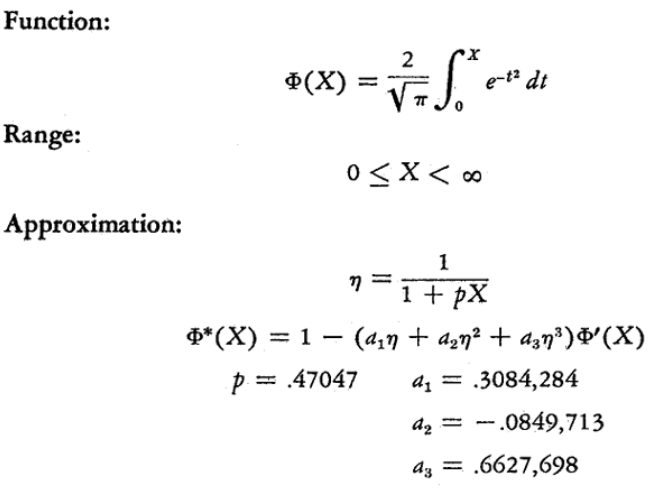

[Reference Link](https://blasingame.engr.tamu.edu/z_zCourse_Archive/P620_18C/P620_zReference/PDF_Txt_Hst_Apr_Cmp_(1955).pdf)

##FIRST

In [ ]:
        SUBROUTINE FIRST

C       THIS SUBROUTINE COMPUTES CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS
C       LOCUS OF EXTREMA ENTERS FIRST QUADRANT BY CROSSING OMEGA AXIS, AND
C       DOES NOT CROSS ITSELF IN THIS QUADRANT. LINK = 1 OR 2

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD
        GO TO (72,171), MODE
    72  WRITE OUTPUT TAPE 6,73
    73  FORMAT(49H0 WRONG SUBROUTINES BEING USED. EXECUTION DELETED )
        CALL EXIT
    171 N1=LINK
        ECY=EXY/PI
        DO 560 L=1,MP
        LL=L
        RHO(L)=-DYO(BETH,ECY)+TRY(0.0)
        IF(S(L)-SH(1))552,554,554

    552 RHO(L)=RHO(L)+CAL(1,SH(1).SW,2,N2)
        IF(S(L)-SCRIT)551,553,553
    551 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SH(1),3,2)-TRY(BETAW)+Z(L)
        GO TO 560
    553 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SH(1),1,2)-TRY(BETAW)+Z(L)
    1   -TRY(BETAW)+Z(L)
        GO TO 560

    554 IF(S(L)-SW)555,555,556
    555 RHO(L)=RHO(L)-CAL(1,SH(1),S(L),N1,1)+CAL(1,S(L),SW,1,N2)
    1   -TRY(BETAW)+Z(L)
        GO TO 560

    556 RHO(L)=RHO(L)-CAL(1,SH(1),SW,N1,2)+TRY(BETAW)
        IF(L-LK)570,570,542
    542 IF(S(L)-SWA)543,570,570
    570 GO TO (572,573),KBD
    572 IF(L-MP)571,560,560
    571 RHO(L)=RHO(L)+EXPF(-XI(L)/i1.0-XSQ(L)/XSQ(MP))
        GO TO 560
    573 RHO(L)=RHO(L)+1.0
        GO TO 560

    543 RHO(L)=RHO(L)-2.0*TRY(BETAWA)+Z(L)
        IF(S(L)-SCRITA)544,545,545
    544 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SWA,3,N22)
        GO TO 560
    545 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SWA,1,N22)

    560 CONTINUE

        RH=SQRTF(BETH-XI(1))
        YST=2.0*EDY*(RH+COEFT(RH))+CAL(2,SH(1),SW,N1,N2)
        GO TO (575,576),KBD
    575 RW=SQRTF(BETAW)
        YST=YST+(1.0-2.0*EXPF(-BETAW)*SAY*(RW+COEFT(RW)))/X(MP)
    576 RETURN
        END

##SECOND

In [ ]:
        SUBROUTINE SECOND

C       THIS SUBROUTINE COMPUTES THE CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS
C       LOCUS OF EXTREMA ENTERS FIRST QUADRANT BY CROSSING BETA AXIS, AND
C       DOES NOT CROSS ITSELF IN THIS QUDRANT. LINK = 3 OR 4.

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD
        GO TO (72,171),MODE
    72  WRITE OUTPUT TAE 6,73
    73  FORMAT(49H0 WRONG SUBROUTINES BEING USED. EXECUTION DELETED )
        CALL EXIT
    171 ECY=EXY/PI
        N1=LINK-2
        DO 540 L=1,MP
        LL=L
        RHO(L)=-DYO(BETH,ECY)
        IF(S(L)-SW)541,541,536

    541 RHO(L)=RHO(L)+Z(L)
        IF(S(L)-SH(1))543,544,544
    544 RHO(L)=RHO(L)-CAL(1,SH(1),S(L),N1,I)+CAL(1,S(L),SW,1,2)
        GO TO 540
    543 RHO(L)=RHO(L)+CAL(1,SH(1),SW,2,2)
        IF(S(L)-SCRIT)545,546,546
    545 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SH(1),3,2)
        GO TO 540
    546 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SH(1),1,2)
        GO TO 540

    536 RHO(L)=RHO(L)-CAL(1,SH(1),SW,N1,2)
        GO TO (548,549),NW
    548 IF(XI(L))538,537,537
    537 RHO(L)=RHO(L)+EXPF(-XI(L))
        GO TO 540

    538 GO TO (560,561),KBD
    560 RHO(L)=RHO(L)+2.0*TRY(0.0)
        IF(L-MP)539,540,540
    539 RHO(L)=RHO(L)+EXPF(-XI(L)/(1.0-XSQ(L)/XSQ(MP)))
        GO TO 540
    561 RHO(L)=RHO(L)+1.0
        GO TO 540

    549 GO TO (550,556,556),MIKE

    550 IF(L-LK)537,537,552
    552 IF(S(L)-SWA)553,548,548
    553 RHO(L)=RHO(L)+Z(L)
        GO TO 554

    556 IF(L-LK)548,548,557
    557 IF(S(L)-SWA)558,538,538
    558 RHO(L)=RHO(L)+2.0*(TRY(0.0)-TRY(BETAWA))+Z(L)
        GO TO 554

    554 IF(S(L)-SCRITA)524,525,525
    524 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SWA,3,N22)
        GO TO 540
    525 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SWA,1,N22)

    540 CONTINUE

        RH=SQRTF(BETH-XI(1))
        YST=CAL(2,SH(1),SW,N1,2)+2.0*EDY*(RH+COEFT(RH))
        RETURN
        END


SyntaxError: invalid decimal literal (<ipython-input-1-303256cbc1df>, line 21)

##THIRD

In [ ]:
from ast import Try
        SUBROUTINE THIRD

C       SUBROUTINE THIRD COMPUTES THE CHARGE DENSITY RHO(1-MP) AND THE
C       COLLECTED CURRENT YST FOR AN ATTRACITNG CYLINDRICAL PROBE (LINK=5)
C       OR A REPELLING CYLINDRICAL PROBE (LINK=6)IN THE CASE WHERE ANY
C       POTENTIAL BARRIERS WHICH MAY EXIST DO NOT AFFECT THE AMOUNT OF
C       COLLECTED CURRENT ( DO NOT AFFECT THE SHAPE OF THE J1 VS E CURVE)

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD, MCD, MZET

    750 GO TO (72,175),MODE
    72  WRITE OUTPUT TAPE 6,73
    73  FORMAT(49H0 WRONG SUBROUTINES BEING USED. EXECUTION DELETED   )
        CALL EXIT

    175 ECY=EXY/PI
    585 DO 730 L=1,MP
        LL=L
        RHO(L)=0.0
        GO TO (200,177,575,177,575),MCD
    200 IF(LINK-5)176,176,177

    176 RHO(L)=-DYO(BETH,ECY)+TRY(0.0)+TRY(BETH)
        GO TO 178

    177 RHO(L)=-DYO(BETH,ECY)
        IF(MCD-1)201,201,575
    201 GO TO (576,575,575),MACK
    576 IF(L-LK)571,571,577
    577 IF(S(L)-SW)578,575,575

    578 IF(S(L)-SCRIT)580,580,581
    580 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SQ,3,2)+Z(L)
        GO TO 730
    581 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SW,1,2)+Z(L)
        GO TO 730

    575 IF(XI(L))572,571,571
    571 RHO(L)=RHO(L)+EXPF(-XI(L))
        GO TO 730
    572 RHO(L)=RHO(L)+2.0*TRY(0.0)
        IF(MCD-1)202,202,740
    202 GO TO (720,178,178),MACK

    178 IF(L-LK)740,740,742
    742 IF(S(L)-SW)732,720,720
    732 RHO(L)=RHO(L)-2.0*TRY(BETAW)+Z(L)
        IF(S(L)-SCRIT)736,737,737
    736 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SW,3,N2)
        GO TO 730
    737 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SW,1,N2)
        GO TO 730
    720 IF(L-LKA)740,740,722
    722 IF(S(L)-SWA)723,740,740
    723 RHO(L)=RHO(L)-2.0*TRY(BETAWA)+Z(L)
        IF(S(L)-SCRITA)726,727,727
    726 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SWA,3,N22)
        GO TO 730
    727 RHO(L)=RHO(L)+2.0*CAL(1,S(L),SWA,1,N22)
        GO TO 730

    740 GO TO (744,745),KBD
    744 IF(L-MP)741,730,730
    741 RHO(L)=RHO(L)+EXPF(-XI(L)/(1.0-XSQ(L)/XSQ(MP)))
        GO TO 730
    745 RHO(L)=RHO(L)+1.0

    730 CONTINUE

        GO TO (181,204,205,204,205),MCD
    181 IF(LINK-5)180,180,204
    180 RH=SQRTF(BETH-XI(1))
        YST=2.0*EDY*(RH+COEFT(RH))
        GO TO (746,747),KBD
    746 RQ=SQRTF(BETH)
        YST=YST+(1.0-2.0*EDY*(RW+COEFT(RW)))/X(MP)
    747 RETURN
    204 YST=EXY
        RETURN
    205 YST=0.0
        RETURN
        END

##FOURTH

In [ ]:
        SUBROUTINE FOURTH

C       THIS SUBROUTINE COMPUTES CHARGE DENSITY RHO(1-MP) AND COLLECTED
C       CURRENT YST, FOR A CYLINDRICAL PROBE, UNDER THE FOLLOWING
C       CONDITIONS.
C       LOCUS OF EXTREMA CROSSES ITSELF IN THE FIRST QUADRANT OF THE
C       (OMEGA,BETA) PLANE

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD
        GO TO (72,171),MODE
    72  WRITE OUTPUT TAPE 6,73
    73  FORMAT(49H0 WRONG SUBROUTINES BEING USED. EXECUTION DELETED )
        CALL EXIT
    171 ECY=EXY/PI
    308 IF(LINK-8)360,360361
    360 N1=LINK-6
        GO TO 362
    361 N1-LINK-8
    262 DO 320 L-1,MP
        LL=L
        IF(LINK-8)365,365,366

    365 RHO(L)=-DYO(BETH,ECY)+TRY(0.0)
        IF(S(L)-SW)321,321,322
    321 RHO(L)=RHO(L)-TRY(BETAW)+Z(L)
        GO TO 323
    322 RHO(L)=RHO(L)-CAL(1,SH(1),CRRISS,N1,2)-CAL(1,CROSS,SW,2,2)
      1  +TRY(BETAW)
        GO TO 370

    366 RHO(L)=-DYO(BETH,ECY)
        IF(S(L)-SW)351,351,352
    351 RHO(L)=RHO(L)+Z(L)
        GO TO 323
    352 RHO(L)=RHO(L)-CAL(1,SH(1),CRISS,N1,2)-CAL(1,CROSS,SW,2,2)
        IF(XI(L))355,256,256
    356 RHO(L)=RHO(L)+EXPF(-XI(L))
        GO TO 320
    355 RHO(L)=RHO(L)+2.0*TRY(0.0)
        GO TO 370

    370 GO TO (371,372),KBD
    371 IF(L-MP)340,320,320
    340 RHO(L)=RHO(L)+EXPF(-XI(L)/(1.0-XSQ(L)/XSQ(MP)))
        GO TO 320
    372 RHO(L)=RHO(L)+1.0
        GO TO 320

    323 IF(S(L)-CROSS)325,325,326
    325 RHO(L)=RHO(L)+CAL(1,CROSS,SW,2,N2)
        GO TO 328
    326 RHO(L)=RHO(L)-CAL(1,SH(1),CRISS,N1,2)-CAL(1,CROSS,S(L),2,1)
      1  +CAL(1,S(L),SW,1,N2)
        GO TO 320

    328 IF(S(L)-SH(1))330,332,332
    330 RHO(L)=RHO(L)+CAL(1,SH(1),CRISS,2,2)
        IF(S(L)-SCRIT)329,331,331
    329 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SH(1),3,2)
        GO TO 329
    331 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),SH(1),1,2)
        GO TO 320

    332 IF(S(L)-CRISS)334,334,335
    334 RHO(L)=RHO(L)-CAL(1,SH(1),S(L),N1,1)+CAL(1,S(L),CRISS,1,2)
        GO TO 320
    335 RHO(L)=RHO(L)-CAL(1,SH(1),CROSS,N1,2)
        IF(S(L)-SCRITA)337,338,338
    337 RHO(L)=RHO(L)+2.0*CAL(1,SH(L),CROSS,3,2)
        GO TO 320
    338 RHO(L)=RHO(L)+2.0*CAL(1,S(L),CROSS,1,2)
        GO TO 320
    320 CONTINUE
        RH=SQRTF(BETH-XI(1))
        YST=2.0*EDY*(RH+COEFT(RH))+CAL(2,SH(1),CRISS,N1,2)
      1  +CAL(2,CROSS,SW,2,N2)
        IF(LINK-8)367,367,700
    367 GO TO (375,700),KBD
    375 RW=SQRTF(BETAW)
        YST=YST+(1.0-2.0*EXPF(-BETAW)*SAY*(RW+COEFT(RW)))/X(MP)
    700 RETURN
        END

##DYO

In [ ]:
        FUNCTION DYO(AA,ECCY)

C       DYO=(1.0/PI)*INTEGRAL FROM A TO INFINITY OF
C           DBETA*EXPF(-BETA)*ARC SIN(SQRTF(XSQ*(BETA-XI(1))/(BETA-XI)))

        DIMENSION THAMU(30),BIN(30),R(30),AMAR(15),COE(15),VIB(30),FM(31)
        EQUIVALENCE (THAMU(1),AMAR(1)),(THAMU(16),COE(1)),(BIN(1),VIB(1)),
    1       (R(1),FM(1))
        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET,HALT

        I=1
        DUM=OMGAG(I)
        DUMM=BETAG(I)
        DUMMY=ALFAG(I)
        A=AA
        ECY=ECCY
        IF(LL-1)40,41,40
    41  DYO=0.5*EXY
        RETURN

    40  IF(A-17.72)205,206,206
    206 DYO=0.0
        RETURN

    205 DENO=1.0-XSQ(LL)
        CAPPA=(XI(LL)-XSQ(LL)*XI(1))/DENOM
        GRRMA=(CAPPA+XI(1))*0.5
        AMU=ABSF(CAPPA-GRRMA)
    185 THETA=XI(LL)-GRRMA
        IF(CAPPA-XI(1))31,30,32

    32  IF(A-CAPPA)130,130,33
    33  IF(CAPAA-XI(LL))30,30,34
    34  IF(XI(LL)-XI(1))30,30,103

    130 IF(LXXX-KEND-1)210,211,210
    211 KKK=KKK+1
        GO TO 212
    210 WRITE OUTPUT TAPE 6,37,A,CAPPA,XI(LL),XI(1),LL,KEND,KKK
        LXXX=KEND+1
        KKK=1
        GO TO 212
    212 A=1.00001*CAPPA
        ECY=EXPF(-A)/PI
        GO TO 103

    31  IF(XI(LL)-CAPPA)30,30,35
    35  IF(XI(1)-XI(LL))30,30,36
    36  IF(A-XI(1))30,102,103

    30  WRITE OUTPUT TAPE 6,37,A,CAPPA,XI(LL),XI(1),LL,KEND
    37  FORMAT(16H DYO TROUBLE A=1PE14.7,7H CAPPA=1PE14.7,8H XI(LL)=
    1    1PE14.7,7H XI(1)=1PE14.7,4H LL=14,6H KEND=214,4H=KKK)
        CALL EXIT

    102 BNOT=A-GRRMA
        IF(AMU-2.0)198,198,199

    199 FLAM=A.U/(AMU-THETA)
        SQM=SQRTF(AMU)
        SQL=SQRTF(FLAM)
        DEE=SQM
        C=1.0
        AR=2.0*SQL*COEFT(SQM/SQL)
        TERM=C*AR
        SUM=TERM

        DP 215 N=1,20
        FLN=N
        DEE=DEE/AMU
        C=-C/8.0*FLOATF((2*N-1)**2)/FLN
        AR=(DEE-AR/FLAM)/(FLN-0.5)
        TERMO=TERM
        TERM=C*AR
        IF(ABSF(TERM)-ABSF(TERMO))216,216,217
    216 SUM=SUM+TERM
        IF(ABSF(SUM)*1.0E-06-ABSF(TERM))215,215,18
    215 CONTINUE
        GO TO 218

    217 SUM=SUM-0.5*TERMO
    218 BKT=EXPF(BNOT-AMU)/AMU*1.2533141*SUM
    200 DYO= = ECY*(XI(1)-XI(LL))*0.5*X(LL)/SCOT(LL)*BKT
        RETURN

    198 V=2.6*AMU
        AL=5.0
        AK=1.6094379
        FI=SQRTF(1.0-(THETA/AMU)**2)
        MAD=3
        GO TO 125

    103 BNOT=A-GRRMA
        IF(AMU-4.1-1.5*THETA/AMU)201,201,202

    202 TLIM=EXPF(-BNOT)
        AIND=QUAD(0.0,TLIM,CDO0.0,0.20,1)/TLIM
F       CDO
        RLT=0.0
        GO TO 83

    201 IF(BNOT-1.25*AMU)104,104,105

    104 V=2.6*AMU
        AL=5.0
        AK=1.6094379
        QNOT=BNOT/AMU
        ALNOT=QNOT+SQRTF(QNOT**2-1.0)
        AKNOT=LOGF(ALNOT)
        FI=SQRTF(1.0-(THETA/AMU)**2)
        MAD=1
        GO TO 125

    121 AINN=STR
        AL=ALNOT
        AK=AKNOT
        MAD=2
        GO TO 125

    125 QAQ=1.0/AL
        COSH=(AL+QAQ)/2.0
        SINH=(AL-QAQ)/2.0
        STR=2./(AMU*FI)*(ATANF((AL-THETA/AMU)/FI)-ATANF((1.-THETA/AMU)/FI
      1   ))-AK+0.5*(AMU*SINH-THETA*AK)
        CSNIM=COSH*SINH
        RZ=AK
        R(1)=SINH
        R(2)=0.5*(CSMIM+RZ)
        AMUFN=-AMU**2/6.0
        THAMU(1)=-THETA/AMU
        THAMU(2)=THAMU(1)**2
        BIN(1)=2.0
        BIN(2)=1.0
        STR=STR+AMUFN*(R(2)+2.0*R(1)*THAMU(1)+RZ*THAMU(2))

        DO 110 N=3,30
        NIM=N-1
        FLN=FLOATF(N)
        AMUFN=-AMUFN*AMU/FLOATF(N+1)
        THAMU(N)=THAMU(NIM)*THAU(1)
        CSNIM=COSH*CSNIM

        NIB=N/2
        DO 116 K=1,NIB
        L=NIB+1-K
        IF(L-1)117,117,118
    117 BIN(1)=FLN
        GO TO 119
    118 BIN(L)=BIN(L-1)+BIN(L)
    119 L0=N-L
    116 BIN(L0)=BIN(L)
        BIN(N)=1.0

        R(N)=(CSNIM+FLOATF(NIM)*R(N-2))/FLN
        TERS=R(N)+RZ*THAMU(N)
        DO 112 I=1,NIM
        NI=N-I
    112 TERS=TERS+THAMU(I)*R(NI)*BIN(I)
        TERM=TERS*AMUFN
        STR=STR+TERM
        IF(STR*1.0E-05-ABSF(TERM))110,110,115
    110 CONTINUE

    115 GO TO (121,122,123),MAD

    122 AIND=(AINN-STR)*EXPF(BNOT-THETA)
        GO TO 127

    123 AIND=STR*EXPF(BNOT-THETA)
        GO TO 127

    105 AIND=0.0
        V=BNOT
        MAD=4
        GO TO 127

    127 EX=V
        IF(EX=1.0)50,51,51
    50  FM(1)=EXPF(EX)*(-LOGF(EX)-0.57721566+EX*(1.0-EX*(.25-EX*(.05555556
    1   -EX*(0.041667-EX*(.00166667-EX*(.00023148-EX*(.00002834-EX*(
    2   .00000310-X*.00000031))) ))) )))
        GO TO 18

    51  TOP=.26777373+EX*(8.6347609+EX*(18.059017+EX*(8.5733287+EX)))
        BOTM=3.9584969+EX*(21.099653+EX*(25.632956+EX*(9.5733223+EX)))
        FM(1)=TOP/(EX*BOTM)
        GO TO 18

    18  VIB(1)=1.0/V
        FM(2)=VIB(1)-FM(1)
        DO 63 J=2,4
        VIB(J)=VIB(J-1)/V
    63  FM(J+1)=(VIB(J)-FM(J))/FLOATF(J)
        TSK1=THETA**2
        TSKKH=TSK1
        AMAR(1)=(AMU/THETA)**2
        COE(1)=0.5
        STQ=1.0+AMAR(1)*COE(1)
        RLT=FM(2)+THETA*FM(3)+TSKI*STQ*(FM(4)+THETA*FM(5))

        DO 10 K=6,30,2
        KIM=K-1
        KH=K/2-1
        TSKKH=TSKKH*TSK1
        AMAR(KH)=AMAR(KH-1)*AMAR(1)
        COE(KH)=COE(KH-1)*FLOATF(K-3)/FLOATF(K-2)
        VIB(KIM)=VIB(KIM-1)/V
        VIB(K)=VIB(KIM)/V
        FM(K)=(VIB(KIM)-FM(KIM))/FLOATF(KIM)
        FM(K+1)=(VIB(K)-FM(K))/FLOATF(K)
        STQ=STQ+AMAR(KH)*COE(KH)
        TERM=TSKKH*STQ*(FM(K)+THETA*FM(K+1))
        RLT=RLT+TERM
        IF(RLT*1.0E-05-ABSF(TERM))10,71,71

    10  CONTINUE

    71  GO TO (180,181,181,180),MAD
    181 RLT=RLT*EXPF*(BNOT-V)
    180 GO TO (83,83,84,83),MAD
    83  ARG=SQRTF(XSQ(LL)*(A-XI(1))/((1.0-XSQ(LL))*(A-CAPPA)))
    190 DYO=ECY*(ATANF(ARG)+(XI(1)-XI(LL))*.5*(X(LL)/SCOT(LL))*(AIND+RLT))
        RETURN
    84  DYO=ECY*(XI(1)-XI(LL))*0.5*(X(LL)/SCOT(LL))*(AIND+RLT)
        RETURN
        END

##CDO

In [ ]:
        FUNCTION CDO(XL)

C       THIS FUNCTION SUBPROGRAM IS USED BY FUNCTION DYO AND IS CALLED
C       THROUGH UNIVERSITY OF TORONTO FORTRAN II NUMBERICAL QUADRATURE
C       SUBPROGRAM QUAD

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

        IF(XL)101,101,102
    101 CDO=0.0
        RETURN
    102 FLN=LOGF(XL)
        CDO=-1.0/((FLN+THETA)*SQRTF(FLN**2-AMU**2))
        RETURN
        END

##TRY

In [ ]:
        FUNCTION TRY(AA)

C       TRY=(1.0/PI)*INTEGRAL FROM A TO BH OF
C           DBETA*EXPF(-BETA)*ARC SIN(SQRTF(XSQ*BETA/(XSQ(MP)*(BETA-XI))))

C       WARNING - FUNCTION TRY MAY NOT GIVE CORRECT RESULT IF MAGNITUDE OF
C       XI(LL) IS GREATER THAN 100

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD,MCD,MZET

        DUMMY=OMGAG(1)
        DUMMY=BETAG(1)
        DUMMY-ALFAG(1)
        A=AA
        GO TO (65,66),KBD
    66  TRY=0.0
        RETURN

    65  IF(LL-MP)35,36,35
    36  TRY=0.5*EXPF(-A)
        RETURN

    35  DOM=XSQ(LL)/XSQ(MP)-1.0
        DRT=SQRTF(DOM)
        BH=-XI(LL)/DOM
        AMU=BH/2.0
        EXPA=EXPF(-AMU)
        THETA=AMU-XI(LL)
        IF(THETA-AMU)75,75,61

    75  WRITE OUT TAPE 6,76,LL,KEND,AMU,THETA,AA
    76  FORMAT(18H FCN TRY. TROUBLE. 2I5,1P3E15.77 )
        CALL EXIT

    61  IF(BH-A)30,30,31

    30  WRITE OUT TAPE 6,76,LL,KEND,AMU,THETA,AA
    70  TRY=0.0
        RETURN

    31  CERN=(AMU/24.0+A/(1.95*AMU))**3+(AMU/(0.92*THETA))**3-1.0
        IF(A)10,11,12
    10  WRITE OUTPUT TAPE 6,76,LLMKEND,AMU,THETA,AA
        A=0.0

    11  IF(CERN)40,40,4

    40  COE-0.5
        AMOK=(AMU/THETA)**2
        AMSK=AMOK
        TSO=THETA
        TSN=0.5*THETA**2
        P=1.0+TS0+TSN
        DO 16 K=4,200,2
        KIM=K-1
        TSO=TSN*THETA/FLOATF(KIM)
        TSN=TSO*THETA/FLOATF(K)
        AMSK=AMSK*AMOK
        COE=COE*FLOATF(KIM)/FLOATF(K)
        P=P+TSO+TSN
        TERM=P*AMSK*COE
        SUM=SUM+TERM
        IF(SUM*1.0E-07-TERM)16,19,19
    16  CONTINUE

    19  TRY=-0.5*(EXPA**2+X(LL)/X(MP)*XI(LL)/DRT*EXPA/THETA*SUM)
        RETURN

    41  FLAM=-AMU/XI(LL)
        W=MAX1F(AMU,8,3)
        SQW=SQRTF(W)
        SQL=SQRTF(FLAM)
        DEE=SQW
        C=1.0
        COO=COEFT(SQW/SQL)
        R=2.0*SQL*COO
        TERM=C*R
        SUM=TERM

        DO 500 N=1,20
        FLN=N
        DEE=DEE/W
        C=C/8.0*FLOATF((2*N-1)**2)/FLN
        R=(DEE-R/FLAM)/(FLN-0.5)
        TERMO=TERM
        TERM=C*R
        IF(ABSF(TERM)-ABSF(TERMO))501,501,498
    501 SAM=SUM+TERM
        IF(SAM-SUM)500,504,500
    500 SUM=SAM
        GO TO 502

    498 SUM=SUM-0.5*TERMO
    502 IF(ABSF(SUM)*1.OE-05-ABSF(TERMO))503,503,504

    503 MISS=1
        N=-1
        IF(AMU-FLAM)513,513,499
    499 IF(AMU-8.3)513,509,508

    508 FACT=1.0+0.125/(AMU+FLAM)+.0703125/(AMU+FLAM)**2
    509 SIM=FLAM/AMU*SQRTF(2.0*PI/FLAM)*COO*FACT
        GO TO 72

    513 WRITE OUTPUT TAPE 6,512,SUM,TERM,AMU,FLAM,MISS
    512 FORMAT(23H FCN TRY NONCONVERGENCE 1P4E12.5,I2)
        GO TO (504,511),MISS

    504 ASYC=PI/AMU*EXPF((AMI-W)/FLAM)*SUM/2.5066282
        TAYC=0.0
        IF(AMU-8.3)525,526,526

    525 AE=1.0+1.O/FLAM
        EXMU=EXPF(-AE*AMU)
        EXW=EXPF(-AE*W)
        C=1.0
        WN=EXW
        UN=EXMU
        Q2N=(EXMU-EXW)/AE
        TERM=C*Q2N
        SUM=TERM

        DO 510 N=1,18
        C=C/FLOATF(2*N)**2
        UN=UN*AMU
        WN=WN*W
        QSNM=(FLOATF(2*N-1)*Q2N-WN+UN)/AE
        UN=UN*AMU
        WN=WN*W
        Q2N=(FLOATF(2*N)*Q2NM-WN+UN)/AE
        TERM=C*Q2N
        SAM=SUM+TERM
        IF(SAM-SUM)510,511,510
    510 SUM=SAM

        MISS=2
        IF(ABSF(SUM)*1.0E-05-ABSF(TERM))513,513,511

    511 TAYC=PI/AMU*EXPF(AMU/FLAM)*SUM

    526 SIM=ASYC+TAYC
    72  TRY=-0.5*(EXPA**2+X(LL)/X(MP)*XI(LL)/DRT*IM/PI)
        RETURN

    12  EXMINA=EXPF(-A)
        IF(CERN)45,45,48
    48  IF(EXMINA-EXPA**2-2.0E-06)49,49,46
    49  TRY=0.0
        RETURN

    45  ALFA=A/AMU-1.0
        COSS=SQRTF(1.0-ALF**2)
        SN=0.5*PI-ATANF(ALF/COSS)
        SNA=COSS
        SNB=0.5*(ALF*COSS+SN)
        ALKIM=ALF
        TSK=0.5*THETA**2
        AMSK1=-AMU/THETA
        AMSKK=AMSK1**2
        P=1.0+THETA
        SUM=SN+P*AMSK1*SNA
        P=P+TSK
        SUM=SUM+P*AMSKK*SNB

        DO 22 K=3,200
        TSK=TSK*THETA/FLOATF(K)
        AMSKK=AMSKK*AMSK1
        ALKIM=ALKIM*ALF
        SNC=(ALKIM*COSS+FLOATF(K-1)*SNA)/FLOATF(K)
        SNA=SNB
        SNB=SNC
        P=P+TSK
        TERM=P*AMSKK*SNC
        SUM=SUM+TERM
        IF(SUM*1.0E-07-ABSF(TERM))22,26,26
    22  CONTINUE

    26  SIM=EXPA*SUM/THETA
        GO TO 50

    46  ALF=A/AMU-1.0
        ALIM=ATANF(ALF/SQRTF(1.0-ALF**2))
        BLIM=0.5*PI
    99  SIM=EXPA*QUAD(ALIM,BLIM,CORE,  0.0    ,0.2,1)
F       CORE
        GO TO 50

    50  ARG=SQRTF(XSQ(LL)*A/((XSQ(LL)-XSQ(MP))*(BH-A)))
    73  TRY = EXMINA*ATANF(ARG)/PI - 0.5*EXPA**2
    1             - 0.5/PI*X(LL)/X(MP)*XI(LL)/DRT*SIM
        RETURN
        END



##CORE

In [ ]:
        FUNCTION CORE(XL)

C       THIS FUNCTION SUBPROGRAM IS USED BY FUNCTION DYO AND IS CALLED
C       THROUGH UNIVERSITY OF TORONTO FORTRAN II NUMBERICAL QUADRATURE
C       SUBPROGRAM QUAD

        DIMENSION X(401),XSQ(401),S(401),DXDS(401),ROP(401),SCOT(401),
    1       COOK(401),XI(401),DXIDS(401),ETA(401),ETAPS(401),ETANG(401),
    2       RHO(401),OMGAG(401),BETAG(401),ALFAG(401),PSIG(401),EPSG(401),
    3       Y(401),Z(401),SH(401)
        COMMON X,XSQ,S,DXDX,ROP,SCOT,COOK,XI,DXIDS,ETA,ETAPS,ETANG,RHO,
    1       OMGAG,BETAG,ALFAG,PSIG,EPSG,Y,Z,SH
        COMMON PI,SQTPI,VIPI,SAY,MODE,M,MP,DELTS,GAMMA,PI3,PI6,PI7,YPOS,
    1       YNEG,NPRINT,KT1,KT2,LL,KEND
        COMMON LINK,BETH,EXY,EDY,N2,N22,NW,SW,SWA,BETAW,BETAWA,MACK,MIKE,
    1       SCRIT,SCRITA,LK,LKA,CRISS,CROSS,YST,AMU,THETA,KBD

        SANXL=AMU*SINF(XL)
        CORE=EXPF(-SANXL)/(SANXL+THETA)
        RETURN
        END